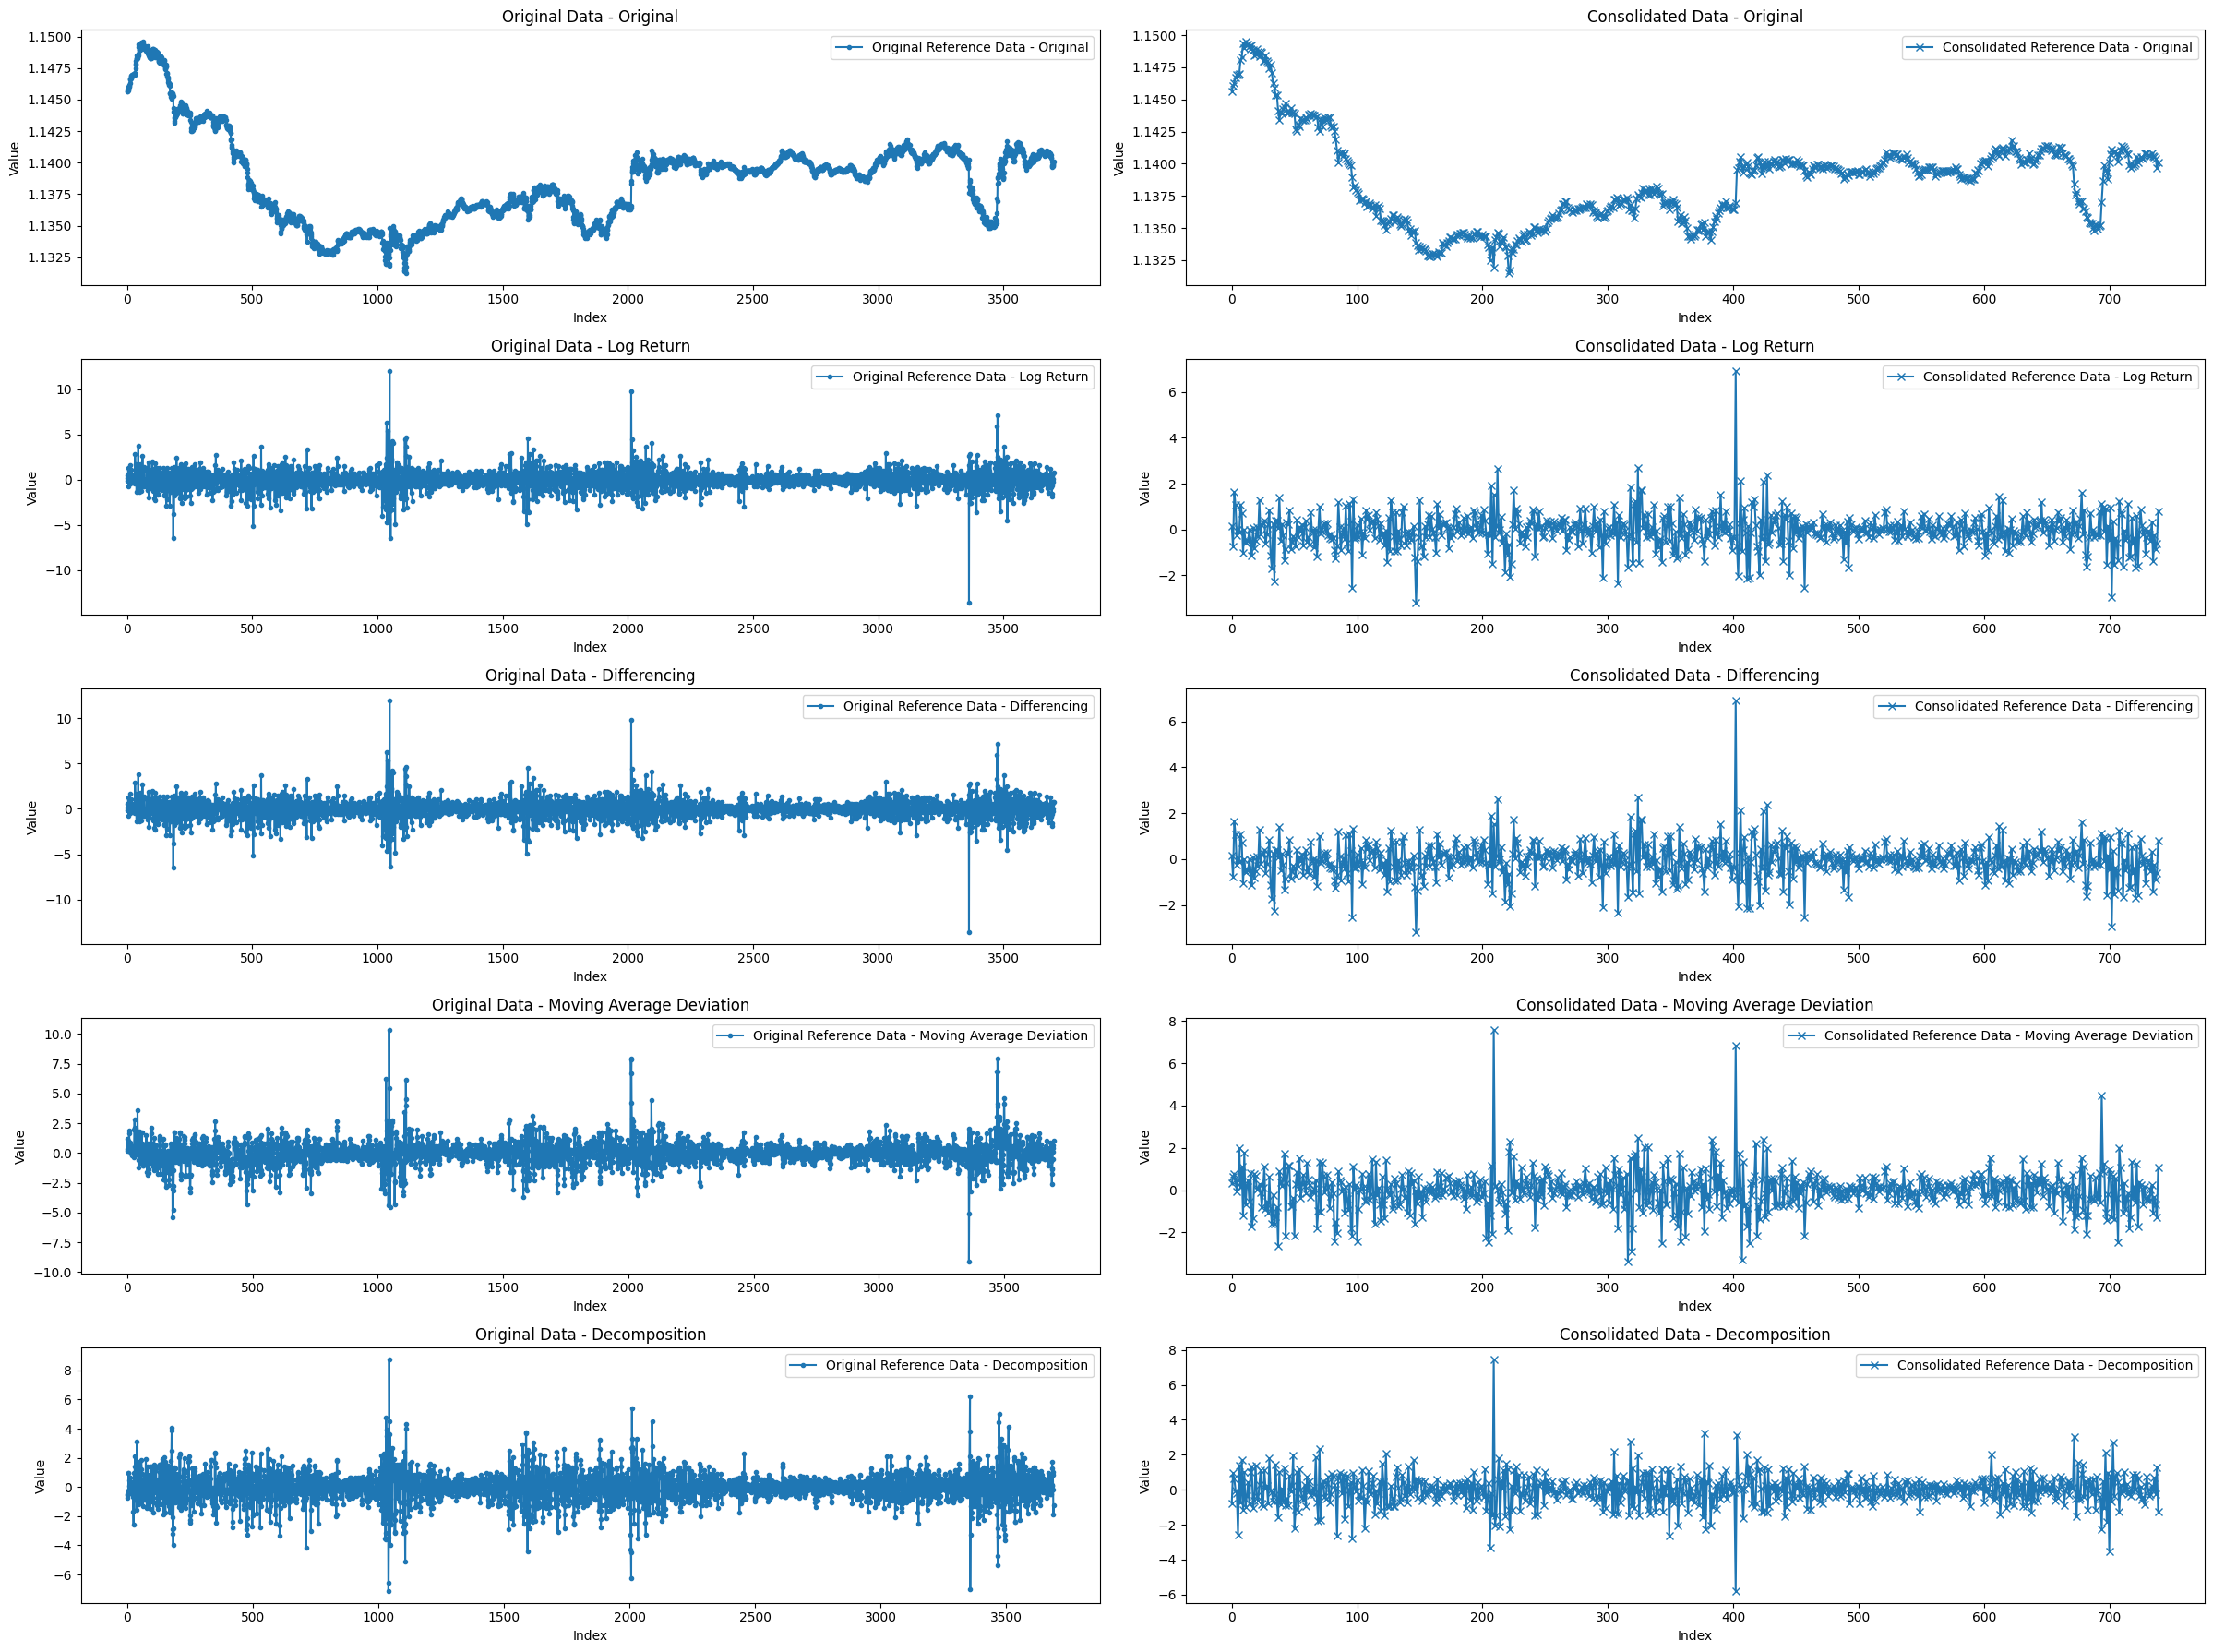

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

class DataProcessor:
    def preprocess_data_log_return(self, data):
        data = np.log(data / data.shift(1))
        data = data.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_differencing(self, data):
        data = data.diff().dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_moving_average_deviation(self, data, window=5):
        moving_avg = data.rolling(window=window).mean()
        deviation = data - moving_avg
        deviation = deviation.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(deviation.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_decompose(self, data):
        data = data[data > 0]
        log_data = np.log(data)
        log_data = log_data.dropna()
        result = seasonal_decompose(log_data, model='additive', period=12).resid
        result = pd.Series(result).dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(result.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def consolidate(self, dataset, target_length):
        total_length = len(dataset)
        assert target_length <= total_length, 'THE TARGET LENGTH CAN ONLY BE SMALLER THAN THE DATASET'
        original_indices = np.linspace(0, total_length - 1, num=total_length)
        target_indices = np.linspace(0, total_length - 1, num=target_length)
        consolidated_data = np.interp(target_indices, original_indices, dataset)
        return consolidated_data

def split_data(data, reference_ratio=0.002, current_ratio=0.01):
    total_length = len(data)
    reference_data = data[:int(total_length * reference_ratio)]
    current_data_1 = data[int(total_length * reference_ratio):int(total_length * (reference_ratio + current_ratio))]
    current_data_2 = data[int(total_length * (reference_ratio + current_ratio)):]
    return reference_data, current_data_1, current_data_2

if __name__ == "__main__":
    data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
    data['target'] = (data['close'].shift(-1) > data['close']).astype(int)
    data = data.dropna()

    reference_data, current_data_1, current_data_2 = split_data(data['close'])
    reference_target, current_target_1, current_target_2 = split_data(data['target'])

    # Preprocess the reference data using different methods
    processor = DataProcessor()
    reference_data_log_return = processor.preprocess_data_log_return(reference_data)
    reference_data_differencing = processor.preprocess_data_differencing(reference_data)
    reference_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(reference_data)
    reference_data_decompose = processor.preprocess_data_decompose(reference_data)

# Consolidate the reference data to two-thirds of its original length for demonstration
target_length = int(len(reference_data) * 1 / 5)
consolidated_reference_data_log_return = processor.consolidate(reference_data_log_return, target_length)
consolidated_reference_data_differencing = processor.consolidate(reference_data_differencing, target_length)
consolidated_reference_data_moving_avg_dev = processor.consolidate(reference_data_moving_avg_dev, target_length)
consolidated_reference_data_decompose = processor.consolidate(reference_data_decompose, target_length)
consolidated_reference_data_original = processor.consolidate(reference_data, target_length)

# Plot the reference data before and after consolidation for each preprocessing method
methods = [
    ('Original', reference_data, consolidated_reference_data_original),
    ('Log Return', reference_data_log_return, consolidated_reference_data_log_return),
    ('Differencing', reference_data_differencing, consolidated_reference_data_differencing),
    ('Moving Average Deviation', reference_data_moving_avg_dev, consolidated_reference_data_moving_avg_dev),
    ('Decomposition', reference_data_decompose, consolidated_reference_data_decompose)
]

plt.figure(figsize=(24, 18))
for i, (method_name, original_data, consolidated_data) in enumerate(methods, start=1):
    plt.subplot(len(methods), 2, 2*i-1)
    plt.plot(original_data.reset_index(drop=True), label=f'Original Reference Data - {method_name}', marker='.')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Original Data - {method_name}')
    plt.legend()
    
    plt.subplot(len(methods), 2, 2*i)
    plt.plot(np.arange(target_length), consolidated_data, label=f'Consolidated Reference Data - {method_name}', marker='x')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Consolidated Data - {method_name}')
    plt.legend()
    
plt.tight_layout()
plt.show()

             timestamp     open     high      low    close  volume
0  2019-01-02 00:25:00  1.14573  1.14574  1.14565  1.14565     128
1  2019-01-02 00:26:00  1.14565  1.14571  1.14564  1.14568      97
2  2019-01-02 00:27:00  1.14567  1.14581  1.14562  1.14578      88
3  2019-01-02 00:28:00  1.14577  1.14579  1.14572  1.14575      52
4  2019-01-02 00:29:00  1.14575  1.14581  1.14573  1.14579      71


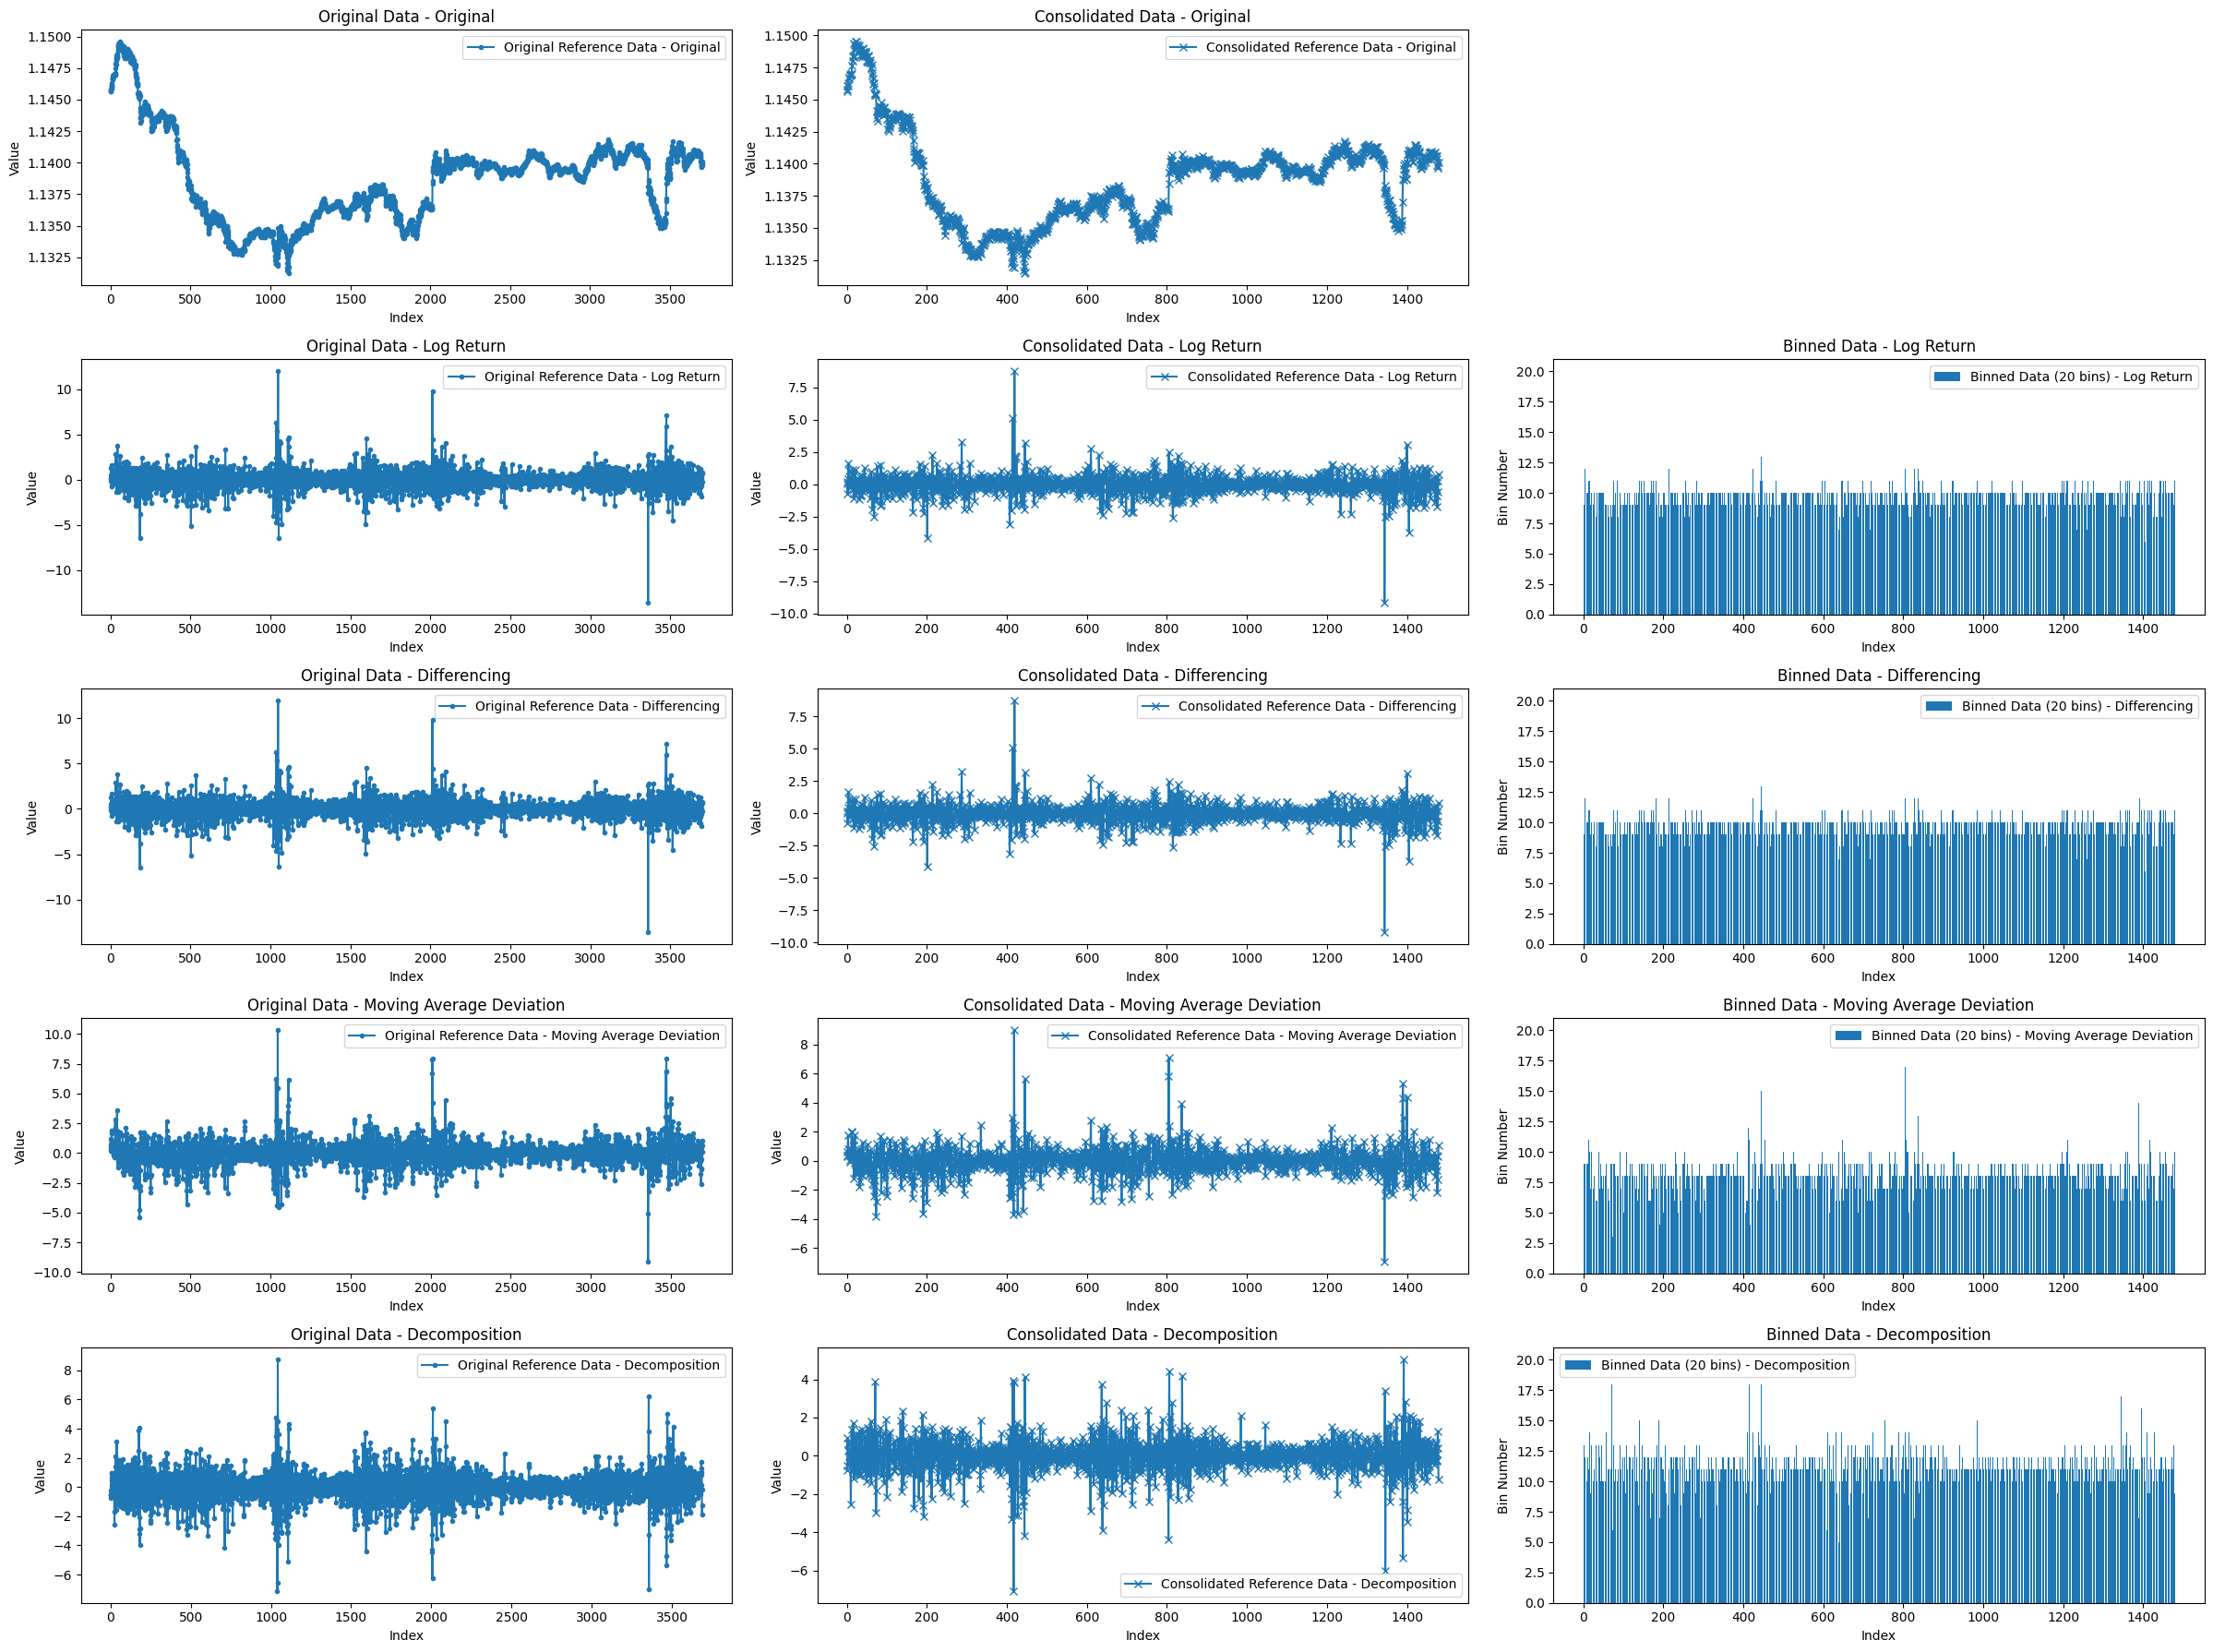

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

class DataProcessor:
    def preprocess_data_log_return(self, data):
        data = np.log(data / data.shift(1))
        data = data.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_differencing(self, data):
        data = data.diff().dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_moving_average_deviation(self, data, window=5):
        moving_avg = data.rolling(window=window).mean()
        deviation = data - moving_avg
        deviation = deviation.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(deviation.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_decompose(self, data):
        data = data[data > 0]
        log_data = np.log(data)
        log_data = log_data.dropna()
        result = seasonal_decompose(log_data, model='additive', period=12).resid
        result = pd.Series(result).dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(result.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def consolidate(self, dataset, target_length):
        total_length = len(dataset)
        assert target_length <= total_length, 'THE TARGET LENGTH CAN ONLY BE SMALLER THAN THE DATASET'
        original_indices = np.linspace(0, total_length - 1, num=total_length)
        target_indices = np.linspace(0, total_length - 1, num=target_length)
        consolidated_data = np.interp(target_indices, original_indices, dataset)
        return consolidated_data
    
    # New method: Create 20-bin discretization
    def bin_data(self, data, num_bins=20):
        binned_data, bin_edges = np.histogram(data, bins=num_bins)
        bin_indices = np.digitize(data, bin_edges) - 1  # Assign each value to a bin
        return bin_indices, bin_edges

def split_data(data, reference_ratio=0.002, current_ratio=0.01):
    total_length = len(data)
    reference_data = data[:int(total_length * reference_ratio)]
    current_data_1 = data[int(total_length * reference_ratio):int(total_length * (reference_ratio + current_ratio))]
    current_data_2 = data[int(total_length * (reference_ratio + current_ratio)):]
    return reference_data, current_data_1, current_data_2

if __name__ == "__main__":
    data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
    print(data.head())
    data['target'] = (data['close'].shift(-1) > data['close']).astype(int)
    data = data.dropna()

    reference_data, current_data_1, current_data_2 = split_data(data['close'])
    reference_target, current_target_1, current_target_2 = split_data(data['target'])

    # Preprocess the reference data using different methods
    processor = DataProcessor()
    reference_data_log_return = processor.preprocess_data_log_return(reference_data)
    reference_data_differencing = processor.preprocess_data_differencing(reference_data)
    reference_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(reference_data)
    reference_data_decompose = processor.preprocess_data_decompose(reference_data)

    # Consolidate the reference data to two-thirds of its original length for demonstration
    target_length = int(len(reference_data) * 2 / 5)
    consolidated_reference_data_log_return = processor.consolidate(reference_data_log_return, target_length)
    consolidated_reference_data_differencing = processor.consolidate(reference_data_differencing, target_length)
    consolidated_reference_data_moving_avg_dev = processor.consolidate(reference_data_moving_avg_dev, target_length)
    consolidated_reference_data_decompose = processor.consolidate(reference_data_decompose, target_length)
    consolidated_reference_data_original = processor.consolidate(reference_data, target_length)

    # Apply binning on the consolidated reference data (20 bins)
    binned_data_log_return, bin_edges_log_return = processor.bin_data(consolidated_reference_data_log_return)
    binned_data_differencing, bin_edges_differencing = processor.bin_data(consolidated_reference_data_differencing)
    binned_data_moving_avg_dev, bin_edges_moving_avg_dev = processor.bin_data(consolidated_reference_data_moving_avg_dev)
    binned_data_decompose, bin_edges_decompose = processor.bin_data(consolidated_reference_data_decompose)

    # Plot the original, consolidated, and binned data for each preprocessing method
    methods = [
        ('Original', reference_data, consolidated_reference_data_original, None),
        ('Log Return', reference_data_log_return, consolidated_reference_data_log_return, binned_data_log_return),
        ('Differencing', reference_data_differencing, consolidated_reference_data_differencing, binned_data_differencing),
        ('Moving Average Deviation', reference_data_moving_avg_dev, consolidated_reference_data_moving_avg_dev, binned_data_moving_avg_dev),
        ('Decomposition', reference_data_decompose, consolidated_reference_data_decompose, binned_data_decompose)
    ]

    plt.figure(figsize=(24, 18))
    for i, (method_name, original_data, consolidated_data, binned_data) in enumerate(methods, start=1):
        plt.subplot(len(methods), 3, 3*i-2)
        plt.plot(original_data.reset_index(drop=True), label=f'Original Reference Data - {method_name}', marker='.')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title(f'Original Data - {method_name}')
        plt.legend()

        plt.subplot(len(methods), 3, 3*i-1)
        plt.plot(np.arange(target_length), consolidated_data, label=f'Consolidated Reference Data - {method_name}', marker='x')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title(f'Consolidated Data - {method_name}')
        plt.legend()

        if binned_data is not None:
            plt.subplot(len(methods), 3, 3*i)
            plt.bar(np.arange(target_length), binned_data, label=f'Binned Data (20 bins) - {method_name}')
            plt.xlabel('Index')
            plt.ylabel('Bin Number')
            plt.title(f'Binned Data - {method_name}')
            plt.legend()

    plt.tight_layout()
    plt.show()


370227
18511


/home/wickstjo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


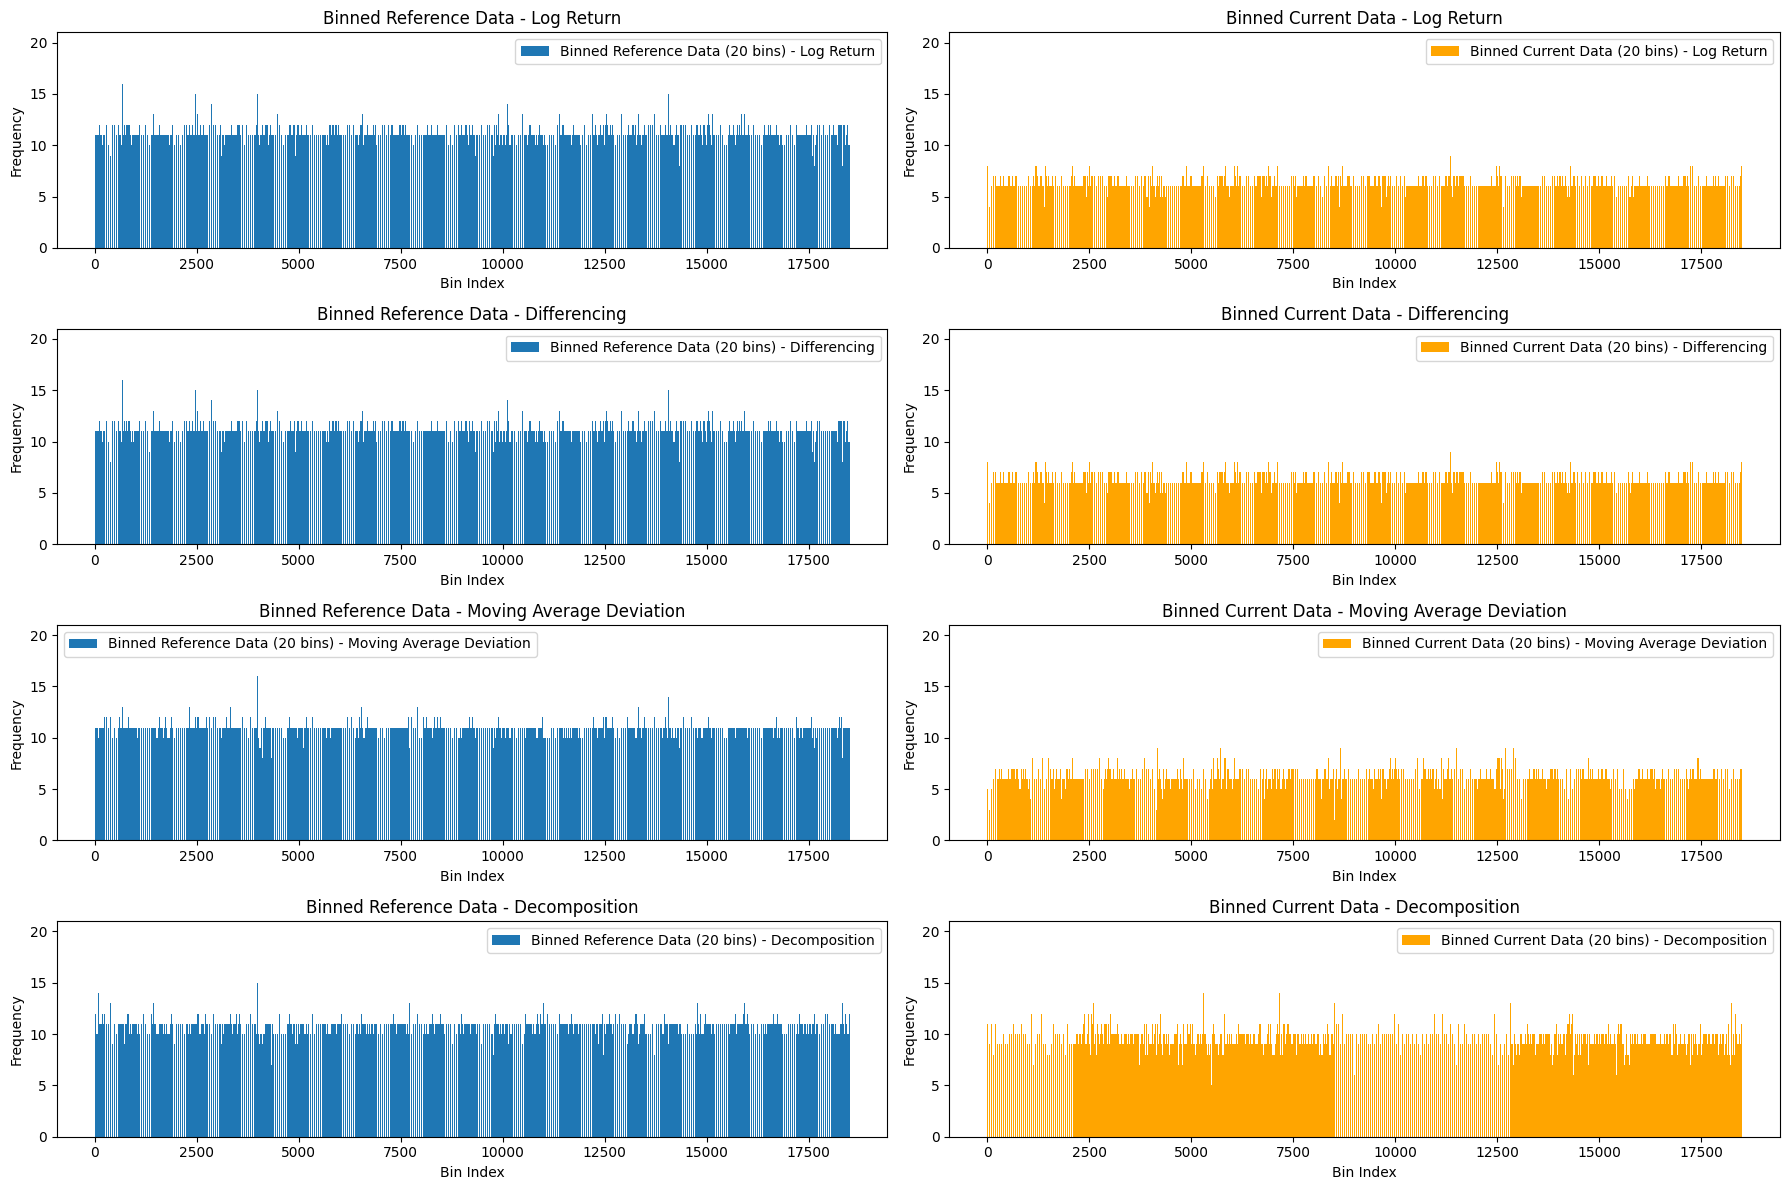

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

class DataProcessor:
    def preprocess_data_log_return(self, data):
        data = np.log(data / data.shift(1))
        data = data.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_differencing(self, data):
        data = data.diff().dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_moving_average_deviation(self, data, window=5):
        moving_avg = data.rolling(window=window).mean()
        deviation = data - moving_avg
        deviation = deviation.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(deviation.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_decompose(self, data):
        data = data[data > 0]
        log_data = np.log(data)
        log_data = log_data.dropna()
        result = seasonal_decompose(log_data, model='additive', period=12).resid
        result = pd.Series(result).dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(result.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def consolidate(self, dataset, target_length):
        total_length = len(dataset)
        assert target_length <= total_length, 'THE TARGET LENGTH CAN ONLY BE SMALLER THAN THE DATASET'
        original_indices = np.linspace(0, total_length - 1, num=total_length)
        target_indices = np.linspace(0, total_length - 1, num=target_length)
        consolidated_data = np.interp(target_indices, original_indices, dataset)
        return consolidated_data

    def bin_data(self, data, num_bins=20):
        binned_data, bin_edges = np.histogram(data, bins=num_bins)
        bin_indices = np.digitize(data, bin_edges) - 1  # Assign each value to a bin
        return bin_indices, bin_edges

def split_data(data, reference_ratio=0.2, current_ratio=0.01):
    total_length = len(data)
    reference_data = data[:int(total_length * reference_ratio)]
    current_data_1 = data[int(total_length * reference_ratio):int(total_length * (reference_ratio + current_ratio))]
    current_data_2 = data[int(total_length * (reference_ratio + current_ratio)):]
    return reference_data, current_data_1, current_data_2

if __name__ == "__main__":
    data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
    data['target'] = (data['close'].shift(-1) > data['close']).astype(int)
    data = data.dropna()

    reference_data, current_data_1, current_data_2 = split_data(data['close'])
    reference_target, current_target_1, current_target_2 = split_data(data['target'])

    # Preprocess the reference data using different methods
    processor = DataProcessor()
    reference_data_log_return = processor.preprocess_data_log_return(reference_data)
    reference_data_differencing = processor.preprocess_data_differencing(reference_data)
    reference_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(reference_data)
    reference_data_decompose = processor.preprocess_data_decompose(reference_data)

    # Preprocess the current data (e.g., current_data_1)
    current_data_log_return = processor.preprocess_data_log_return(current_data_1)
    current_data_differencing = processor.preprocess_data_differencing(current_data_1)
    current_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(current_data_1)
    current_data_decompose = processor.preprocess_data_decompose(current_data_1)

    # Consolidate the reference data to a smaller length for comparison
    target_length = int(len(current_data_1))
    print(len(reference_data_log_return))
    print(target_length)
    consolidated_reference_data_log_return = processor.consolidate(reference_data_log_return, target_length)
    consolidated_reference_data_differencing = processor.consolidate(reference_data_differencing, target_length)
    consolidated_reference_data_moving_avg_dev = processor.consolidate(reference_data_moving_avg_dev, target_length)
    consolidated_reference_data_decompose = processor.consolidate(reference_data_decompose, target_length)

    # Bin the consolidated reference data and the current data (20 bins)
    binned_reference_log_return, bin_edges_log_return = processor.bin_data(consolidated_reference_data_log_return)
    binned_current_log_return, _ = processor.bin_data(current_data_log_return, num_bins=len(bin_edges_log_return) - 1)

    binned_reference_differencing, bin_edges_differencing = processor.bin_data(consolidated_reference_data_differencing)
    binned_current_differencing, _ = processor.bin_data(current_data_differencing, num_bins=len(bin_edges_differencing) - 1)

    binned_reference_moving_avg_dev, bin_edges_moving_avg_dev = processor.bin_data(consolidated_reference_data_moving_avg_dev)
    binned_current_moving_avg_dev, _ = processor.bin_data(current_data_moving_avg_dev, num_bins=len(bin_edges_moving_avg_dev) - 1)

    binned_reference_decompose, bin_edges_decompose = processor.bin_data(consolidated_reference_data_decompose)
    binned_current_decompose, _ = processor.bin_data(current_data_decompose, num_bins=len(bin_edges_decompose) - 1)

    # Plot the comparison between binned consolidated reference data and current data for each preprocessing method
    methods = [
        ('Log Return', binned_reference_log_return, binned_current_log_return),
        ('Differencing', binned_reference_differencing, binned_current_differencing),
        ('Moving Average Deviation', binned_reference_moving_avg_dev, binned_current_moving_avg_dev),
        ('Decomposition', binned_reference_decompose, binned_current_decompose)
    ]

    plt.figure(figsize=(18, 12))
    for i, (method_name, binned_ref_data, binned_curr_data) in enumerate(methods, start=1):
        plt.subplot(len(methods), 2, 2*i-1)
        plt.bar(np.arange(len(binned_ref_data)), binned_ref_data, label=f'Binned Reference Data (20 bins) - {method_name}')
        plt.xlabel('Bin Index')
        plt.ylabel('Frequency')
        plt.title(f'Binned Reference Data - {method_name}')
        plt.legend()

        plt.subplot(len(methods), 2, 2*i)
        plt.bar(np.arange(len(binned_curr_data)), binned_curr_data, label=f'Binned Current Data (20 bins) - {method_name}', color='orange')
        plt.xlabel('Bin Index')
        plt.ylabel('Frequency')
        plt.title(f'Binned Current Data - {method_name}')
        plt.legend()

    plt.tight_layout()
    plt.show()


# KDE

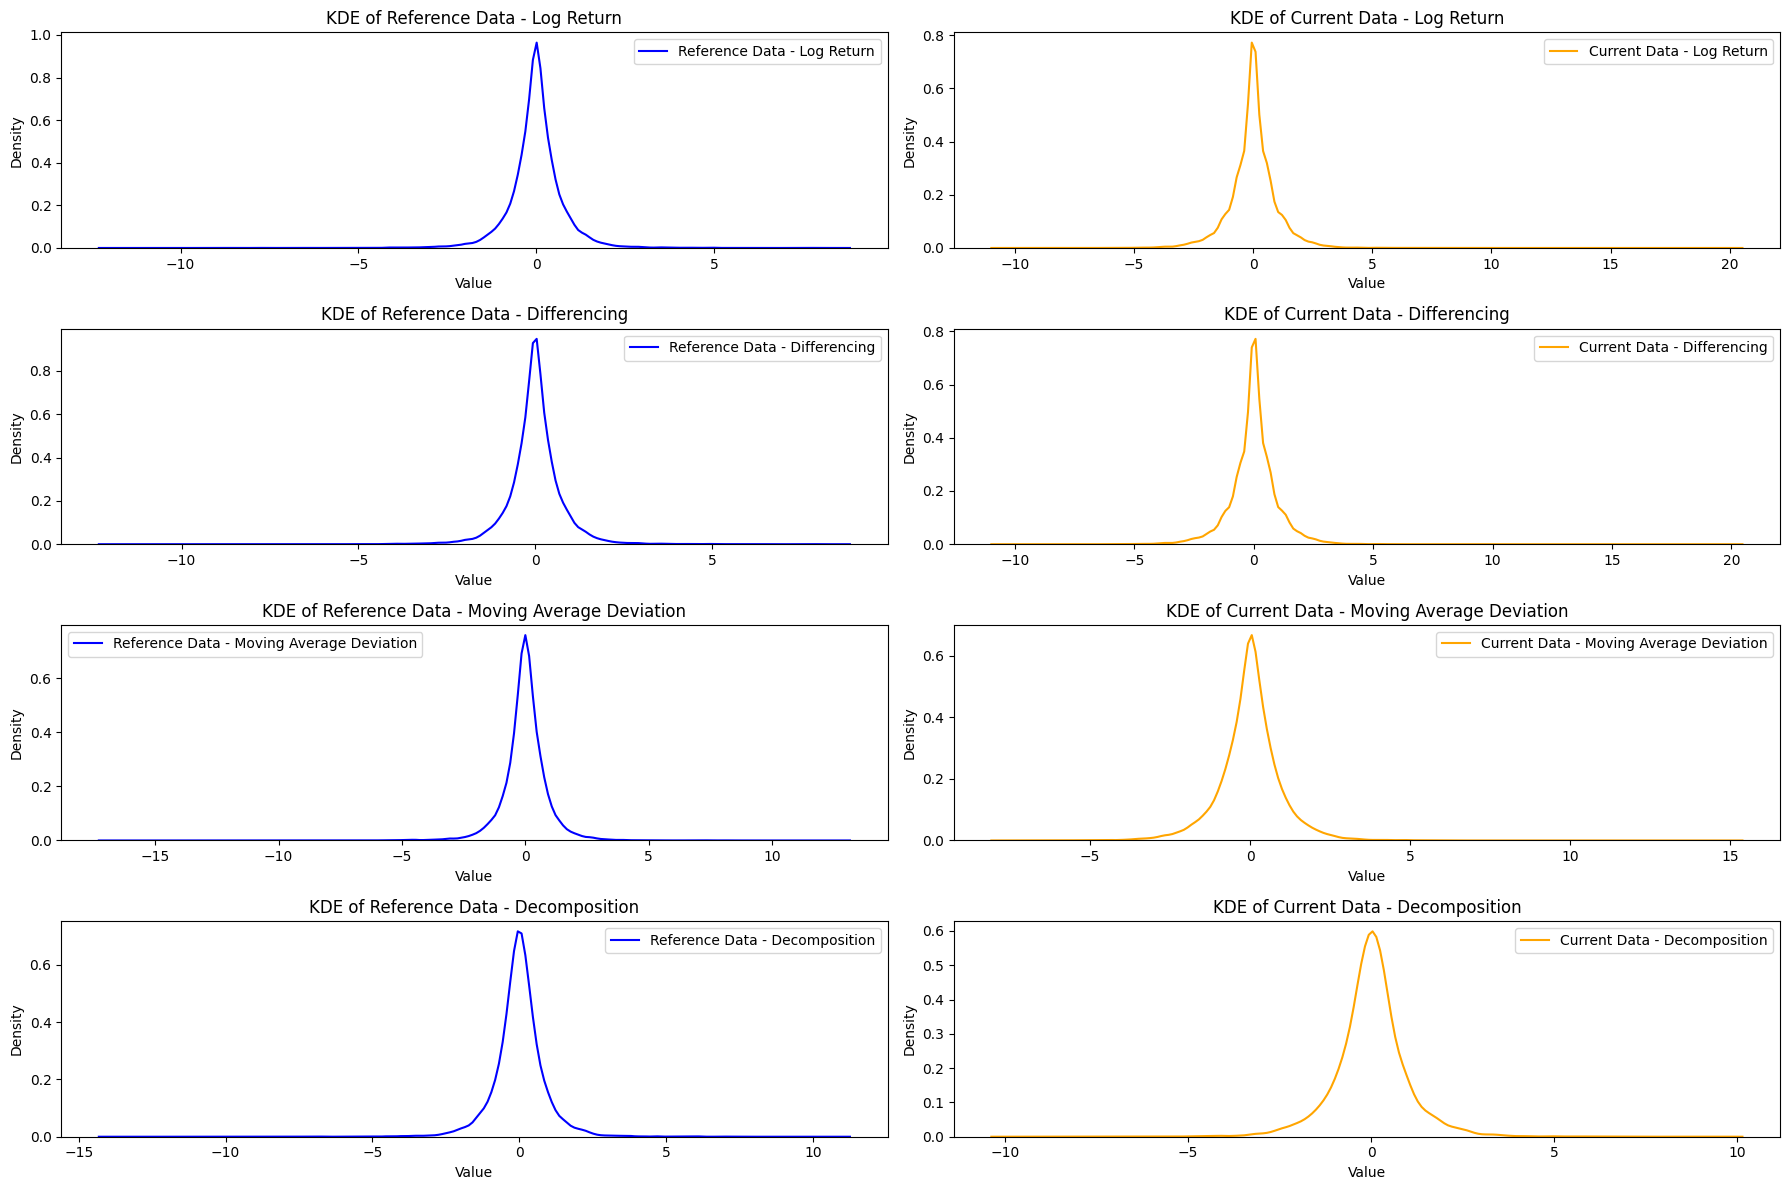

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

class DataProcessor:
    def preprocess_data_log_return(self, data):
        data = np.log(data / data.shift(1))
        data = data.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_differencing(self, data):
        data = data.diff().dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_moving_average_deviation(self, data, window=5):
        moving_avg = data.rolling(window=window).mean()
        deviation = data - moving_avg
        deviation = deviation.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(deviation.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_decompose(self, data):
        data = data[data > 0]
        log_data = np.log(data)
        log_data = log_data.dropna()
        result = seasonal_decompose(log_data, model='additive', period=12).resid
        result = pd.Series(result).dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(result.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def consolidate(self, dataset, target_length):
        total_length = len(dataset)
        assert target_length <= total_length, 'THE TARGET LENGTH CAN ONLY BE SMALLER THAN THE DATASET'
        original_indices = np.linspace(0, total_length - 1, num=total_length)
        target_indices = np.linspace(0, total_length - 1, num=target_length)
        consolidated_data = np.interp(target_indices, original_indices, dataset)
        return consolidated_data

    def bin_data(self, data, num_bins=20):
        binned_data, bin_edges = np.histogram(data, bins=num_bins)
        bin_indices = np.digitize(data, bin_edges) - 1  # Assign each value to a bin
        return bin_indices, bin_edges

def split_data(data, reference_ratio=0.2, current_ratio=0.01):
    total_length = len(data)
    reference_data = data[:int(total_length * reference_ratio)]
    current_data_1 = data[int(total_length * reference_ratio):int(total_length * (reference_ratio + current_ratio))]
    current_data_2 = data[int(total_length * (reference_ratio + current_ratio)):]
    return reference_data, current_data_1, current_data_2

if __name__ == "__main__":
    data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
    data['target'] = (data['close'].shift(-1) > data['close']).astype(int)
    data = data.dropna()

    reference_data, current_data_1, current_data_2 = split_data(data['close'])
    reference_target, current_target_1, current_target_2 = split_data(data['target'])

    # Preprocess the reference data using different methods
    processor = DataProcessor()
    reference_data_log_return = processor.preprocess_data_log_return(reference_data)
    reference_data_differencing = processor.preprocess_data_differencing(reference_data)
    reference_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(reference_data)
    reference_data_decompose = processor.preprocess_data_decompose(reference_data)

    # Preprocess the current data (e.g., current_data_1)
    current_data_log_return = processor.preprocess_data_log_return(current_data_1)
    current_data_differencing = processor.preprocess_data_differencing(current_data_1)
    current_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(current_data_1)
    current_data_decompose = processor.preprocess_data_decompose(current_data_1)

    # Consolidate the reference data to a smaller length for comparison
    target_length = int(len(current_data_1))
    consolidated_reference_data_log_return = processor.consolidate(reference_data_log_return, target_length)
    consolidated_reference_data_differencing = processor.consolidate(reference_data_differencing, target_length)
    consolidated_reference_data_moving_avg_dev = processor.consolidate(reference_data_moving_avg_dev, target_length)
    consolidated_reference_data_decompose = processor.consolidate(reference_data_decompose, target_length)

    # Plot the KDE comparison between consolidated reference data and current data for each preprocessing method
    methods = [
        ('Log Return', consolidated_reference_data_log_return, current_data_log_return),
        ('Differencing', consolidated_reference_data_differencing, current_data_differencing),
        ('Moving Average Deviation', consolidated_reference_data_moving_avg_dev, current_data_moving_avg_dev),
        ('Decomposition', consolidated_reference_data_decompose, current_data_decompose)
    ]

    plt.figure(figsize=(18, 12))
    for i, (method_name, ref_data, curr_data) in enumerate(methods, start=1):
        plt.subplot(len(methods), 2, 2*i-1)
        sns.kdeplot(ref_data, label=f'Reference Data - {method_name}', color='blue')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'KDE of Reference Data - {method_name}')
        plt.legend()

        plt.subplot(len(methods), 2, 2*i)
        sns.kdeplot(curr_data, label=f'Current Data - {method_name}', color='orange')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'KDE of Current Data - {method_name}')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Histogram and KDE

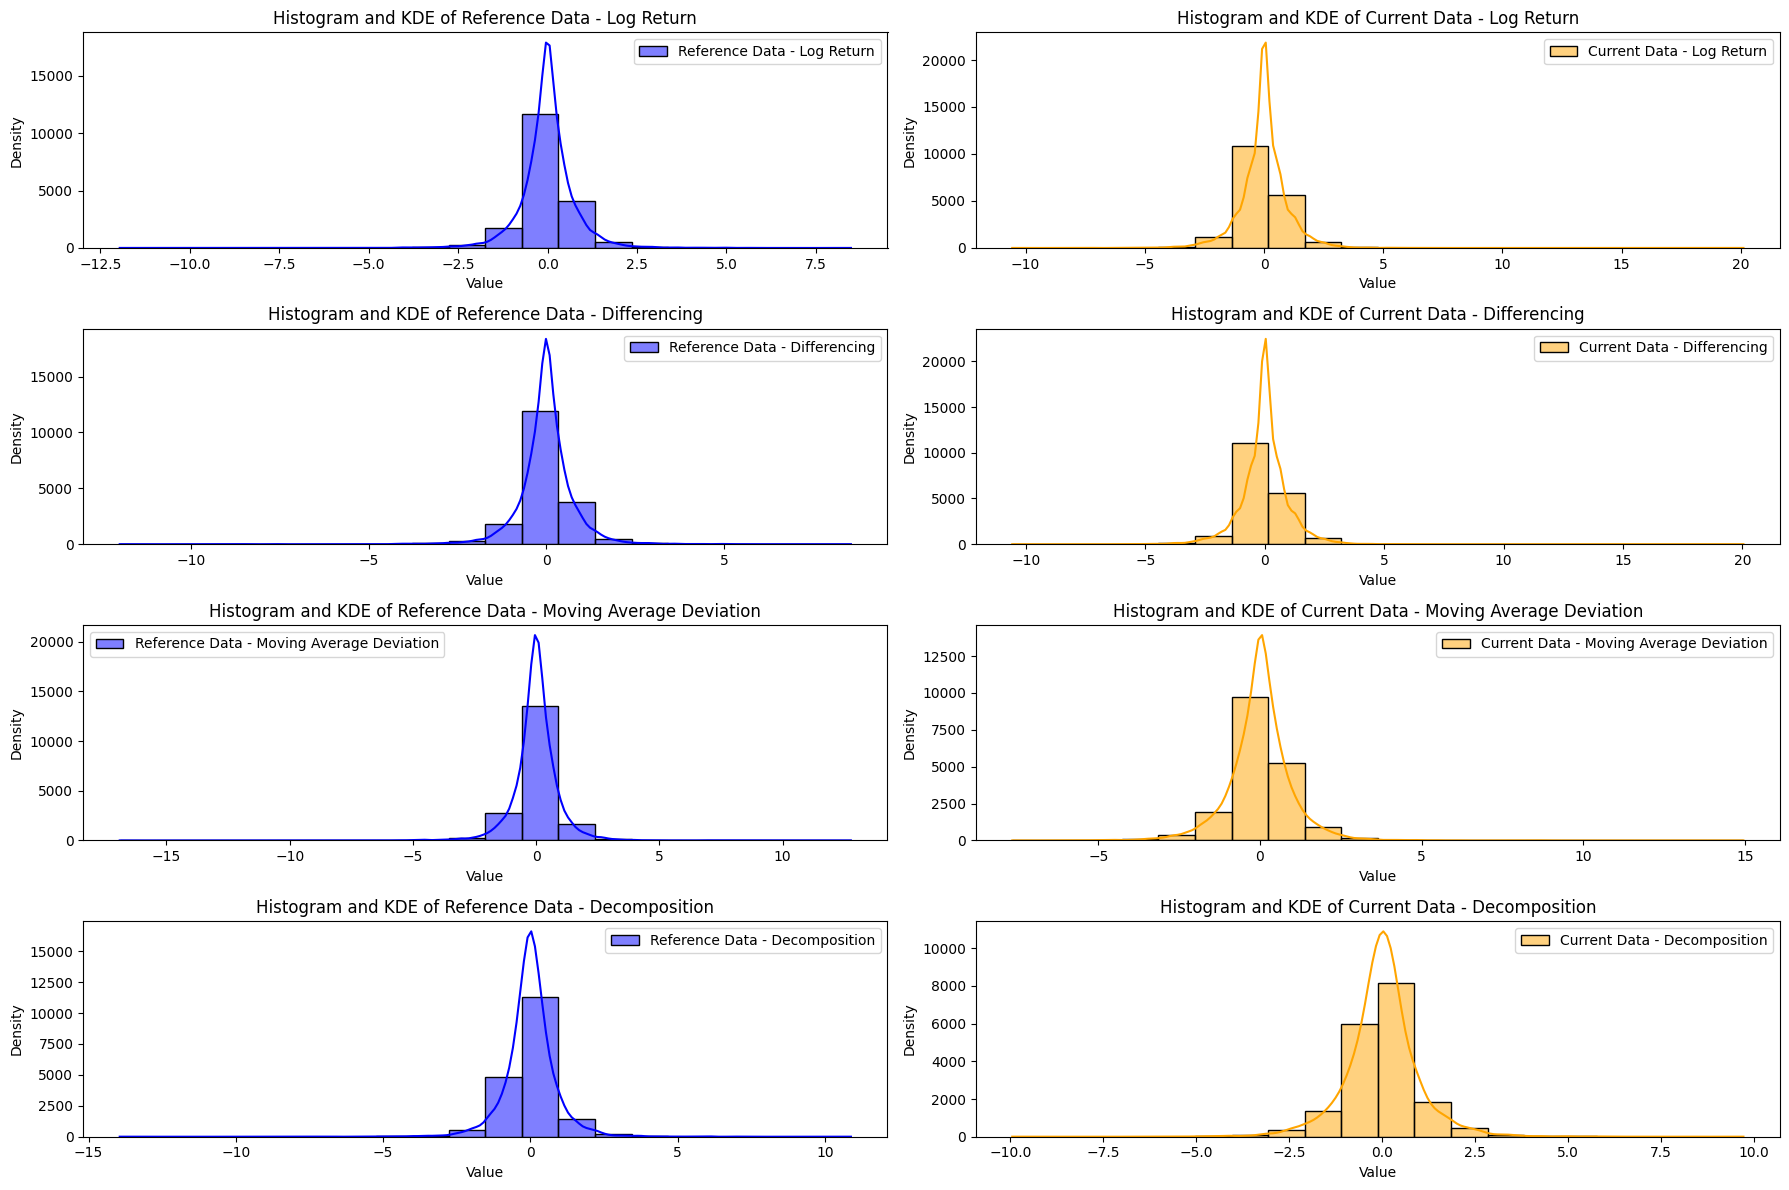

In [6]:
    plt.figure(figsize=(18, 12))
    for i, (method_name, ref_data, curr_data) in enumerate(methods, start=1):
        plt.subplot(len(methods), 2, 2*i-1)
        sns.histplot(ref_data, bins=20, kde=True, label=f'Reference Data - {method_name}', color='blue')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Histogram and KDE of Reference Data - {method_name}')
        plt.legend()

        plt.subplot(len(methods), 2, 2*i)
        sns.histplot(curr_data, bins=20, kde=True, label=f'Current Data - {method_name}', color='orange')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Histogram and KDE of Current Data - {method_name}')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Wasserstein distance 

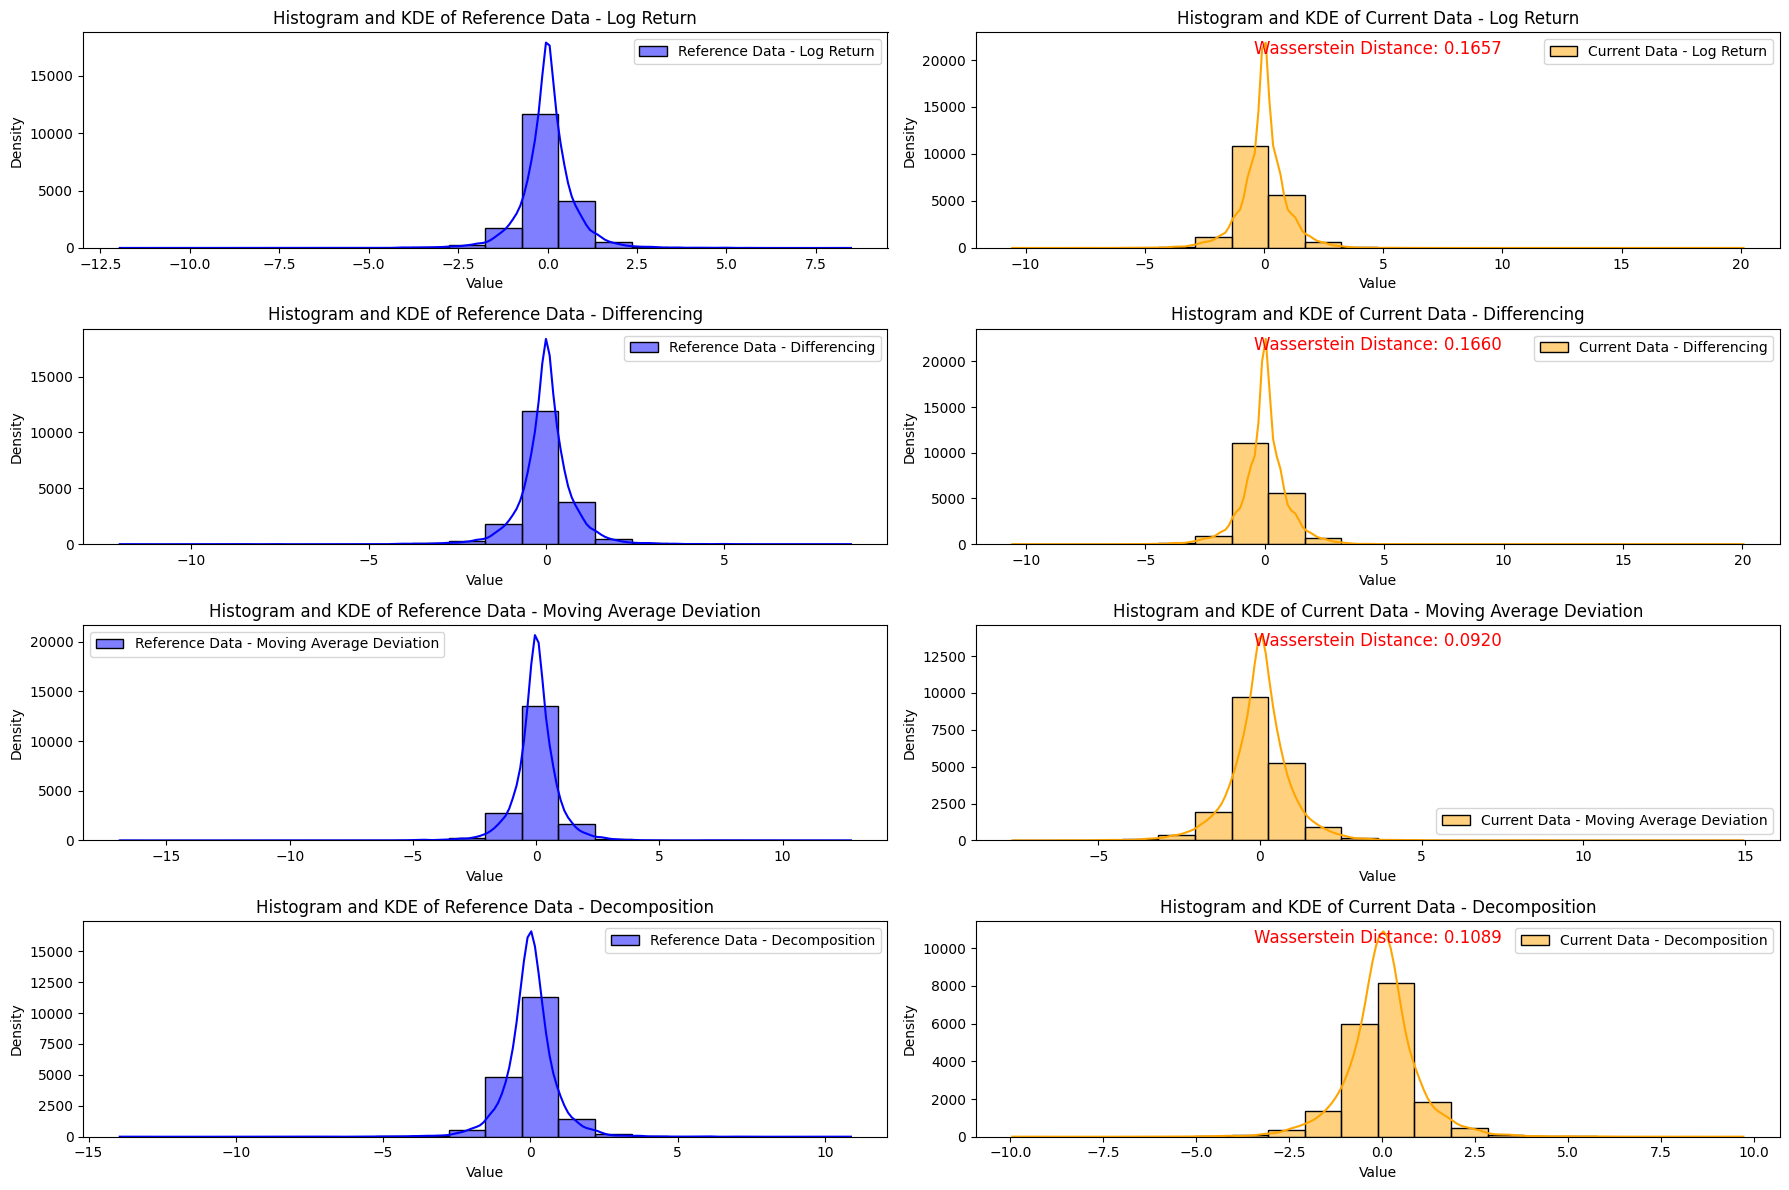

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from scipy.stats import wasserstein_distance

class DataProcessor:
    def preprocess_data_log_return(self, data):
        data = np.log(data / data.shift(1))
        data = data.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_differencing(self, data):
        data = data.diff().dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_moving_average_deviation(self, data, window=5):
        moving_avg = data.rolling(window=window).mean()
        deviation = data - moving_avg
        deviation = deviation.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(deviation.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_decompose(self, data):
        data = data[data > 0]
        log_data = np.log(data)
        log_data = log_data.dropna()
        result = seasonal_decompose(log_data, model='additive', period=12).resid
        result = pd.Series(result).dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(result.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def consolidate(self, dataset, target_length):
        total_length = len(dataset)
        assert target_length <= total_length, 'THE TARGET LENGTH CAN ONLY BE SMALLER THAN THE DATASET'
        original_indices = np.linspace(0, total_length - 1, num=total_length)
        target_indices = np.linspace(0, total_length - 1, num=target_length)
        consolidated_data = np.interp(target_indices, original_indices, dataset)
        return consolidated_data

    def bin_data(self, data, num_bins=20):
        binned_data, bin_edges = np.histogram(data, bins=num_bins)
        bin_indices = np.digitize(data, bin_edges) - 1  # Assign each value to a bin
        return bin_indices, bin_edges

def split_data(data, reference_ratio=0.2, current_ratio=0.01):
    total_length = len(data)
    reference_data = data[:int(total_length * reference_ratio)]
    current_data_1 = data[int(total_length * reference_ratio):int(total_length * (reference_ratio + current_ratio))]
    current_data_2 = data[int(total_length * (reference_ratio + current_ratio)):]
    return reference_data, current_data_1, current_data_2

if __name__ == "__main__":
    data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
    data['target'] = (data['close'].shift(-1) > data['close']).astype(int)
    data = data.dropna()

    reference_data, current_data_1, current_data_2 = split_data(data['close'])
    #reference_target, current_target_1, current_target_2 = split_data(data['target'])

    # Preprocess the reference data using different methods
    processor = DataProcessor()
    reference_data_log_return = processor.preprocess_data_log_return(reference_data)
    reference_data_differencing = processor.preprocess_data_differencing(reference_data)
    reference_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(reference_data)
    reference_data_decompose = processor.preprocess_data_decompose(reference_data)

    # Preprocess the current data (e.g., current_data_1)
    current_data_log_return = processor.preprocess_data_log_return(current_data_1)
    current_data_differencing = processor.preprocess_data_differencing(current_data_1)
    current_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(current_data_1)
    current_data_decompose = processor.preprocess_data_decompose(current_data_1)

    # Consolidate the reference data to a smaller length for comparison
    target_length = int(len(current_data_1))
    consolidated_reference_data_log_return = processor.consolidate(reference_data_log_return, target_length)
    consolidated_reference_data_differencing = processor.consolidate(reference_data_differencing, target_length)
    consolidated_reference_data_moving_avg_dev = processor.consolidate(reference_data_moving_avg_dev, target_length)
    consolidated_reference_data_decompose = processor.consolidate(reference_data_decompose, target_length)

    # Calculate Wasserstein distance for each preprocessing method
    methods = [
        ('Log Return', consolidated_reference_data_log_return, current_data_log_return),
        ('Differencing', consolidated_reference_data_differencing, current_data_differencing),
        ('Moving Average Deviation', consolidated_reference_data_moving_avg_dev, current_data_moving_avg_dev),
        ('Decomposition', consolidated_reference_data_decompose, current_data_decompose)
    ]

    wasserstein_distances = []
    for method_name, ref_data, curr_data in methods:
        distance = wasserstein_distance(ref_data, curr_data)
        wasserstein_distances.append((method_name, distance))

    # Plot the histogram and KDE comparison between consolidated reference data and current data for each preprocessing method
    plt.figure(figsize=(18, 12))
    for i, (method_name, ref_data, curr_data) in enumerate(methods, start=1):
        plt.subplot(len(methods), 2, 2*i-1)
        sns.histplot(ref_data, bins=20, kde=True, label=f'Reference Data - {method_name}', color='blue')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Histogram and KDE of Reference Data - {method_name}')
        plt.legend()

        plt.subplot(len(methods), 2, 2*i)
        sns.histplot(curr_data, bins=20, kde=True, label=f'Current Data - {method_name}', color='orange')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Histogram and KDE of Current Data - {method_name}')
        plt.legend()

        # Add Wasserstein distance annotation
        distance = wasserstein_distances[i-1][1]
        plt.annotate(f'Wasserstein Distance: {distance:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')

    plt.tight_layout()
    plt.show()

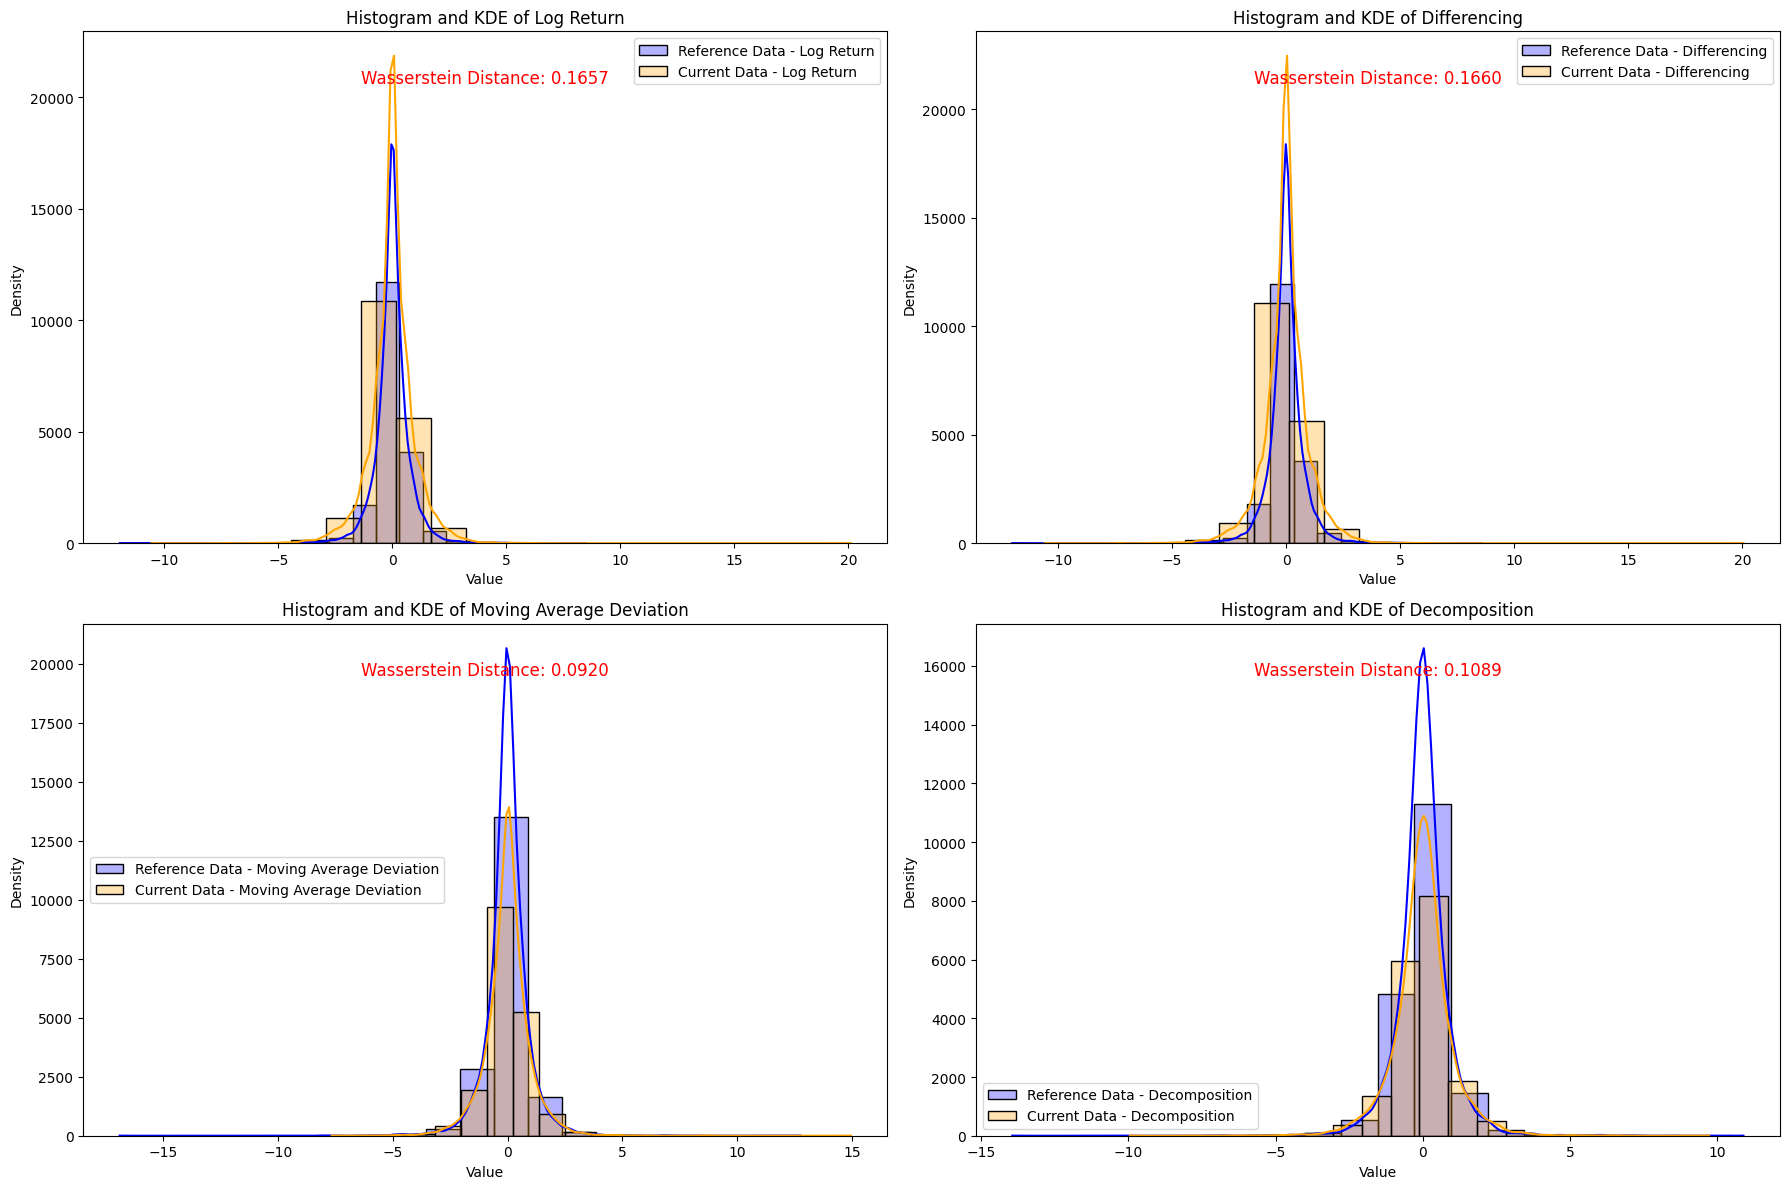

In [10]:
    # Plot the histogram and KDE comparison between consolidated reference data and current data for each preprocessing method
    plt.figure(figsize=(18, 12))
    for i, (method_name, ref_data, curr_data) in enumerate(methods, start=1):
        plt.subplot(2, 2, i)
        sns.histplot(ref_data, bins=20, kde=True, label=f'Reference Data - {method_name}', color='blue', alpha=0.3)
        sns.histplot(curr_data, bins=20, kde=True, label=f'Current Data - {method_name}', color='orange', alpha=0.3)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Histogram and KDE of {method_name}')
        plt.legend()

        # Add Wasserstein distance annotation
        distance = wasserstein_distances[i-1][1]
        plt.annotate(f'Wasserstein Distance: {distance:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')

    plt.tight_layout()
    plt.show()

# Adding drift manually

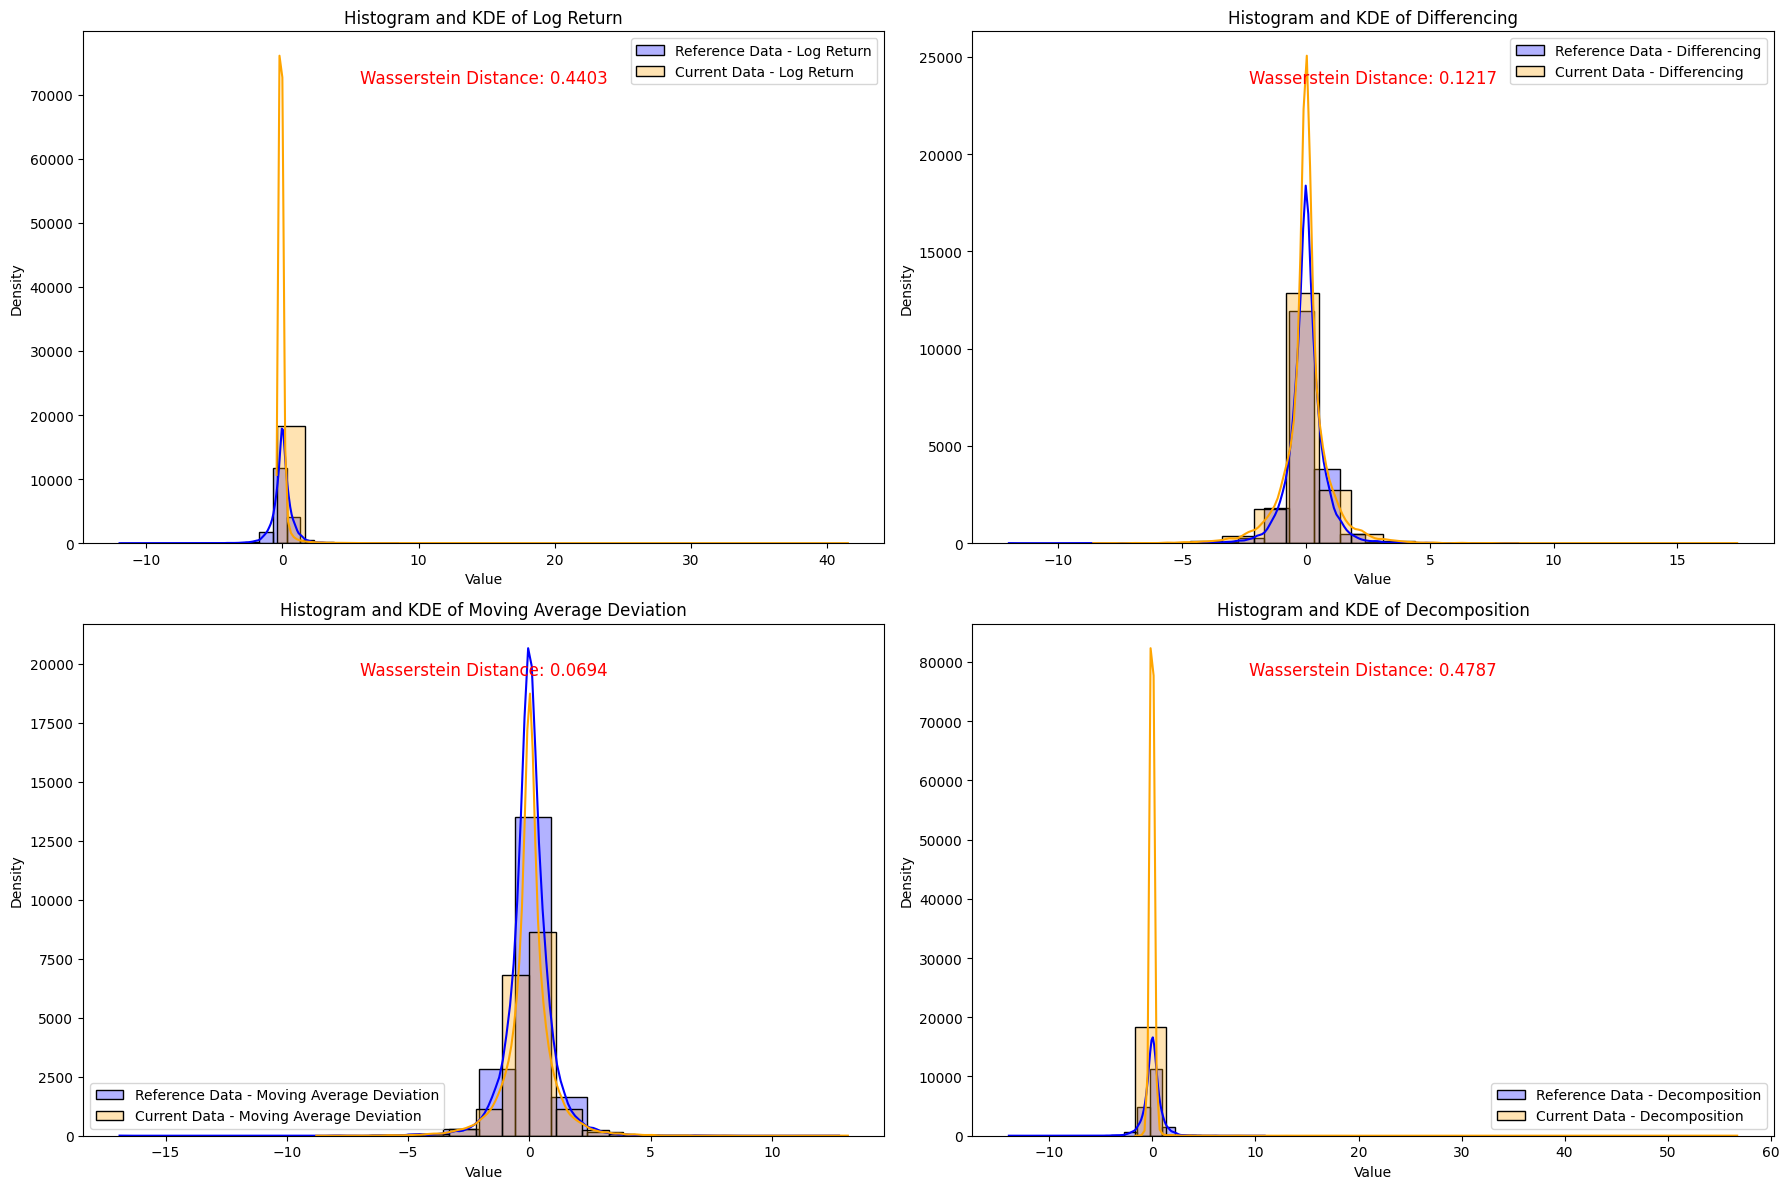

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from scipy.stats import wasserstein_distance

class DataProcessor:
    def preprocess_data_log_return(self, data):
        data = np.log(data / data.shift(1))
        data = data.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_differencing(self, data):
        data = data.diff().dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_moving_average_deviation(self, data, window=5):
        moving_avg = data.rolling(window=window).mean()
        deviation = data - moving_avg
        deviation = deviation.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(deviation.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_decompose(self, data):
        data = data[data > 0]
        log_data = np.log(data)
        log_data = log_data.dropna()
        result = seasonal_decompose(log_data, model='additive', period=12).resid
        result = pd.Series(result).dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(result.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def consolidate(self, dataset, target_length):
        total_length = len(dataset)
        assert target_length <= total_length, 'THE TARGET LENGTH CAN ONLY BE SMALLER THAN THE DATASET'
        original_indices = np.linspace(0, total_length - 1, num=total_length)
        target_indices = np.linspace(0, total_length - 1, num=target_length)
        consolidated_data = np.interp(target_indices, original_indices, dataset)
        return consolidated_data

    def bin_data(self, data, num_bins=20):
        binned_data, bin_edges = np.histogram(data, bins=num_bins)
        bin_indices = np.digitize(data, bin_edges) - 1  # Assign each value to a bin
        return bin_indices, bin_edges

def split_data(data, reference_ratio=0.2, current_ratio=0.01):
    total_length = len(data)
    reference_data = data[:int(total_length * reference_ratio)]
    current_data_1 = data[int(total_length * reference_ratio):int(total_length * (reference_ratio + current_ratio))]
    current_data_2 = data[int(total_length * (reference_ratio + current_ratio)):]
    return reference_data, current_data_1, current_data_2

if __name__ == "__main__":
    data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
    data['target'] = (data['close'].shift(-1) > data['close']).astype(int)
    data = data.dropna()

    reference_data, current_data_1, current_data_2 = split_data(data['close'])
    #reference_target, current_target_1, current_target_2 = split_data(data['target'])

    # Introduce drift in the current data
    drift_factor = 0.1
    current_data_1 = current_data_1 * (1 + drift_factor * np.arange(len(current_data_1)))

    # Preprocess the reference data using different methods
    processor = DataProcessor()
    reference_data_log_return = processor.preprocess_data_log_return(reference_data)
    reference_data_differencing = processor.preprocess_data_differencing(reference_data)
    reference_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(reference_data)
    reference_data_decompose = processor.preprocess_data_decompose(reference_data)

    # Preprocess the current data (e.g., current_data_1)
    current_data_log_return = processor.preprocess_data_log_return(current_data_1)
    current_data_differencing = processor.preprocess_data_differencing(current_data_1)
    current_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(current_data_1)
    current_data_decompose = processor.preprocess_data_decompose(current_data_1)

    # Consolidate the reference data to a smaller length for comparison
    target_length = int(len(current_data_1))
    consolidated_reference_data_log_return = processor.consolidate(reference_data_log_return, target_length)
    consolidated_reference_data_differencing = processor.consolidate(reference_data_differencing, target_length)
    consolidated_reference_data_moving_avg_dev = processor.consolidate(reference_data_moving_avg_dev, target_length)
    consolidated_reference_data_decompose = processor.consolidate(reference_data_decompose, target_length)

    # Calculate Wasserstein distance for each preprocessing method
    methods = [
        ('Log Return', consolidated_reference_data_log_return, current_data_log_return),
        ('Differencing', consolidated_reference_data_differencing, current_data_differencing),
        ('Moving Average Deviation', consolidated_reference_data_moving_avg_dev, current_data_moving_avg_dev),
        ('Decomposition', consolidated_reference_data_decompose, current_data_decompose)
    ]

    wasserstein_distances = []
    for method_name, ref_data, curr_data in methods:
        distance = wasserstein_distance(ref_data, curr_data)
        wasserstein_distances.append((method_name, distance))

    # Plot the histogram and KDE comparison between consolidated reference data and current data for each preprocessing method
    plt.figure(figsize=(18, 12))
    for i, (method_name, ref_data, curr_data) in enumerate(methods, start=1):
        plt.subplot(2, 2, i)
        sns.histplot(ref_data, bins=20, kde=True, label=f'Reference Data - {method_name}', color='blue', alpha=0.3)
        sns.histplot(curr_data, bins=20, kde=True, label=f'Current Data - {method_name}', color='orange', alpha=0.3)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Histogram and KDE of {method_name}')
        plt.legend()

        # Add Wasserstein distance annotation
        distance = wasserstein_distances[i-1][1]
        plt.annotate(f'Wasserstein Distance: {distance:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')

    plt.tight_layout()
    plt.show()

# Comparison

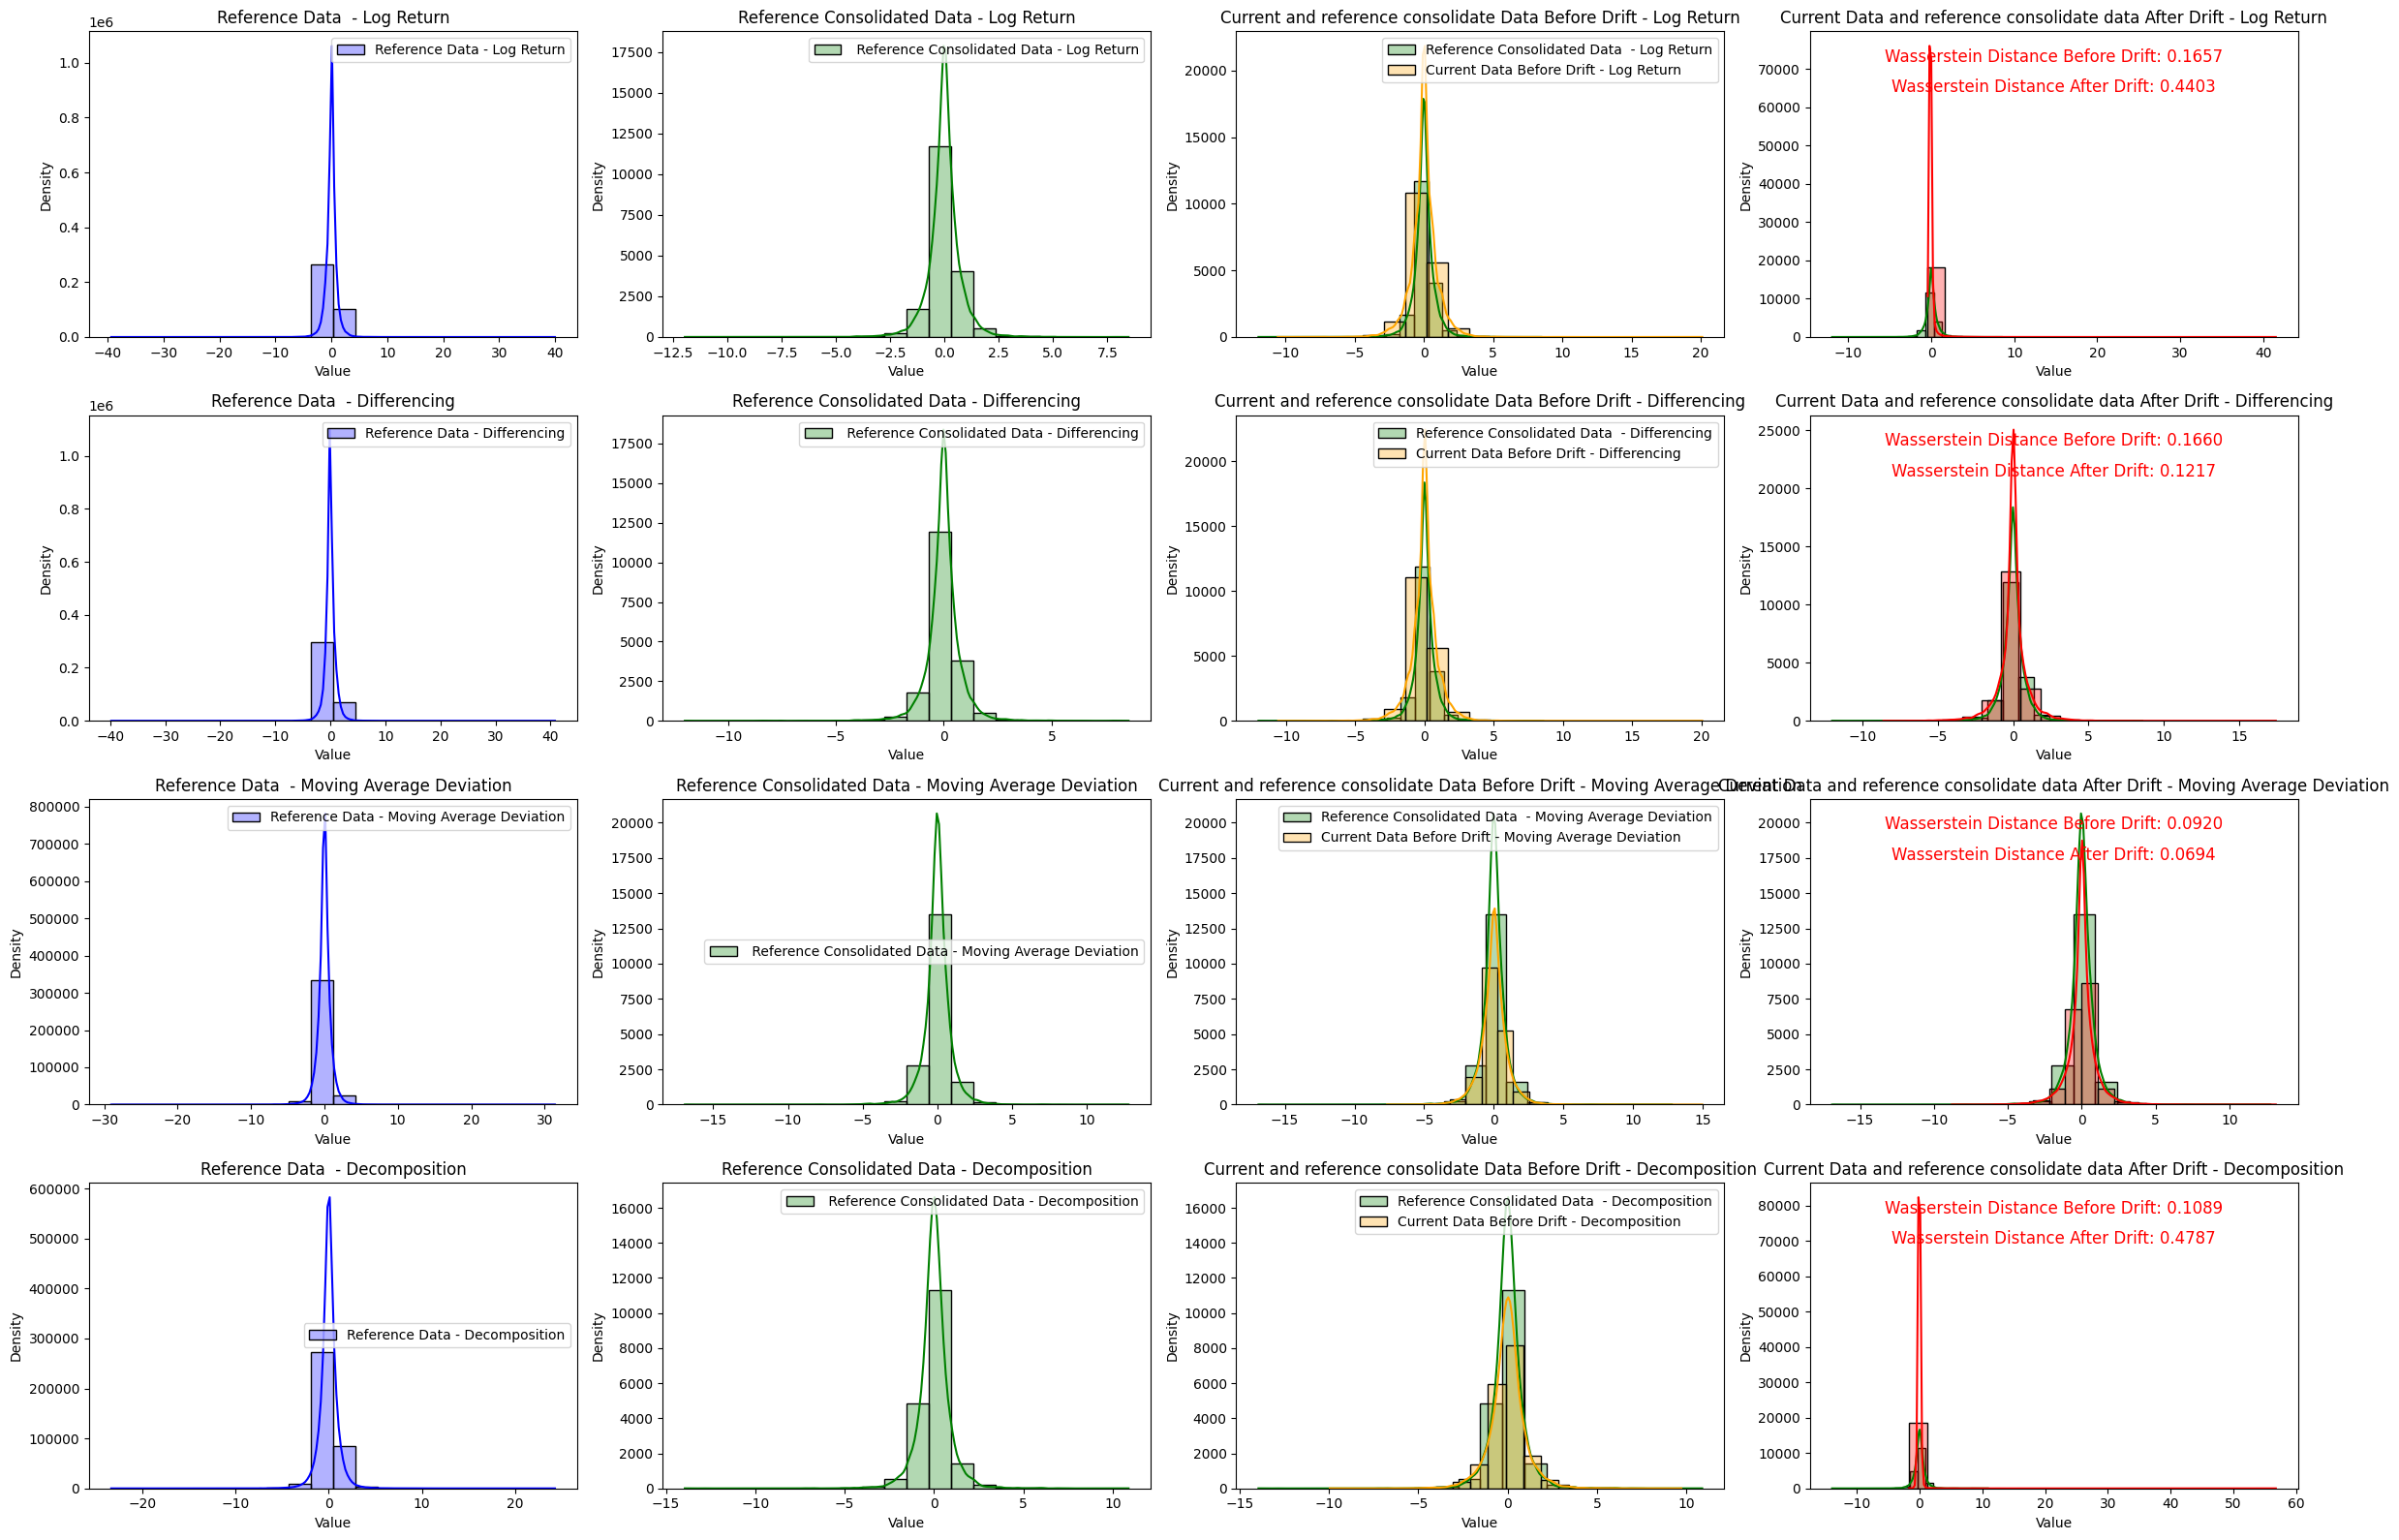

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from scipy.stats import wasserstein_distance

class DataProcessor:
    def preprocess_data_log_return(self, data):
        data = np.log(data / data.shift(1))
        data = data.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_differencing(self, data):
        data = data.diff().dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_moving_average_deviation(self, data, window=5):
        moving_avg = data.rolling(window=window).mean()
        deviation = data - moving_avg
        deviation = deviation.dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(deviation.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def preprocess_data_decompose(self, data):
        data = data[data > 0]
        log_data = np.log(data)
        log_data = log_data.dropna()
        result = seasonal_decompose(log_data, model='additive', period=12).resid
        result = pd.Series(result).dropna()
        scaler = StandardScaler()
        scaled_result = scaler.fit_transform(result.values.reshape(-1, 1))
        return pd.Series(scaled_result.flatten())

    def consolidate(self, dataset, target_length):
        total_length = len(dataset)
        assert target_length <= total_length, 'THE TARGET LENGTH CAN ONLY BE SMALLER THAN THE DATASET'
        original_indices = np.linspace(0, total_length - 1, num=total_length)
        target_indices = np.linspace(0, total_length - 1, num=target_length)
        consolidated_data = np.interp(target_indices, original_indices, dataset)
        return consolidated_data

    def bin_data(self, data, num_bins=20):
        binned_data, bin_edges = np.histogram(data, bins=num_bins)
        bin_indices = np.digitize(data, bin_edges) - 1  # Assign each value to a bin
        return bin_indices, bin_edges

def split_data(data, reference_ratio=0.2, current_ratio=0.01):
    total_length = len(data)
    reference_data = data[:int(total_length * reference_ratio)]
    current_data_1 = data[int(total_length * reference_ratio):int(total_length * (reference_ratio + current_ratio))]
    current_data_2 = data[int(total_length * (reference_ratio + current_ratio)):]
    return reference_data, current_data_1, current_data_2

if __name__ == "__main__":
    data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
    data['target'] = (data['close'].shift(-1) > data['close']).astype(int)
    data = data.dropna()

    reference_data, current_data_1, current_data_2 = split_data(data['close'])
    #reference_target, current_target_1, current_target_2 = split_data(data['target'])

    # Introduce drift in the current data
    drift_factor = 0.1
    current_data_1_drifted = current_data_1 * (1 + drift_factor * np.arange(len(current_data_1)))

    # Preprocess the reference data using different methods
    processor = DataProcessor()
    reference_data_log_return = processor.preprocess_data_log_return(reference_data)
    reference_data_differencing = processor.preprocess_data_differencing(reference_data)
    reference_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(reference_data)
    reference_data_decompose = processor.preprocess_data_decompose(reference_data)

    # Preprocess the current data (e.g., current_data_1)
    current_data_log_return = processor.preprocess_data_log_return(current_data_1)
    current_data_differencing = processor.preprocess_data_differencing(current_data_1)
    current_data_moving_avg_dev = processor.preprocess_data_moving_average_deviation(current_data_1)
    current_data_decompose = processor.preprocess_data_decompose(current_data_1)

    # Preprocess the drifted current data
    current_data_log_return_drifted = processor.preprocess_data_log_return(current_data_1_drifted)
    current_data_differencing_drifted = processor.preprocess_data_differencing(current_data_1_drifted)
    current_data_moving_avg_dev_drifted = processor.preprocess_data_moving_average_deviation(current_data_1_drifted)
    current_data_decompose_drifted = processor.preprocess_data_decompose(current_data_1_drifted)

    # Consolidate the reference data to a smaller length for comparison
    target_length = int(len(current_data_1))
    consolidated_reference_data_log_return = processor.consolidate(reference_data_log_return, target_length)
    consolidated_reference_data_differencing = processor.consolidate(reference_data_differencing, target_length)
    consolidated_reference_data_moving_avg_dev = processor.consolidate(reference_data_moving_avg_dev, target_length)
    consolidated_reference_data_decompose = processor.consolidate(reference_data_decompose, target_length)

    # Calculate Wasserstein distance for each preprocessing method
    methods = [
        ('Log Return', reference_data_log_return, consolidated_reference_data_log_return, current_data_log_return, current_data_log_return_drifted),
        ('Differencing', reference_data_differencing, consolidated_reference_data_differencing, current_data_differencing, current_data_differencing_drifted),
        ('Moving Average Deviation', reference_data_moving_avg_dev, consolidated_reference_data_moving_avg_dev, current_data_moving_avg_dev, current_data_moving_avg_dev_drifted),
        ('Decomposition', reference_data_decompose, consolidated_reference_data_decompose, current_data_decompose, current_data_decompose_drifted)
    ]

    plt.figure(figsize=(24, 16))
    for i, (method_name, ref_data, ref_cons_data, curr_data, curr_data_drifted) in enumerate(methods, start=1):


        
        # Original Data
        plt.subplot(len(methods), 4, 4*i-3)
        sns.histplot(ref_data, bins=20, kde=True, label=f'Reference Data - {method_name}', color='blue', alpha=0.3)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Reference Data  - {method_name}')
        plt.legend()

        # Consolidated Data
        plt.subplot(len(methods), 4, 4*i-2)
        sns.histplot(ref_cons_data, bins=20, kde=True, label=f' Reference Consolidated Data - {method_name}', color='green', alpha=0.3)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Reference Consolidated Data - {method_name}')
        plt.legend()

        # Current and reference consolidate Data Before Drift
        plt.subplot(len(methods), 4, 4*i-1)
        sns.histplot(ref_cons_data, bins=20, kde=True, label=f'Reference Consolidated Data  - {method_name}', color='green', alpha=0.3)
        sns.histplot(curr_data, bins=20, kde=True, label=f'Current Data Before Drift - {method_name}', color='orange', alpha=0.3)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Current and reference consolidate Data Before Drift - {method_name}')
        plt.legend()

        # Current Data and reference consolidate data After Drift
        plt.subplot(len(methods), 4, 4*i)
        sns.histplot(ref_cons_data, bins=20, kde=True, label=f'Reference Consolidated Data  - {method_name}', color='green', alpha=0.3)
        sns.histplot(curr_data_drifted, bins=20, kde=True, label=f'Current Data After Drift - {method_name}', color='red', alpha=0.3)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Current Data and reference consolidate data After Drift - {method_name}')
        #plt.legend()

        # Add Wasserstein distance annotation
        distance_before_drift = wasserstein_distance(ref_cons_data, curr_data)
        distance_after_drift = wasserstein_distance(ref_cons_data, curr_data_drifted)
        plt.annotate(f'Wasserstein Distance Before Drift: {distance_before_drift:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')
        plt.annotate(f'Wasserstein Distance After Drift: {distance_after_drift:.4f}', xy=(0.5, 0.8), xycoords='axes fraction', ha='center', fontsize=12, color='red')

    plt.tight_layout()
    plt.show()